# Data Loading

In [1]:
import pandas as pd


df = pd.read_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\2021_Green_Taxi_Trip_Data.csv")

C:\Users\Acer\AppData\Local\Temp\ipykernel_9160\1834426516.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\2021_Green_Taxi_Trip_Data.csv")


In [2]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [3]:
df.isnull().sum()

VendorID                  249115
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag        412434
RatecodeID                412434
PULocationID                   0
DOLocationID                   0
passenger_count           412434
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1068755
improvement_surcharge          0
total_amount                   0
payment_type              412434
trip_type                 412434
congestion_surcharge      412434
dtype: int64

In [4]:
df["lpep_dropoff_datetime"]

0          01/01/2021 12:19:52 AM
1          01/01/2021 12:34:44 AM
2          01/01/2021 12:51:55 AM
3          01/01/2021 12:04:56 AM
4          01/01/2021 12:16:40 AM
                    ...          
1068750    01/01/2022 12:19:00 AM
1068751    12/31/2021 11:56:00 PM
1068752    01/01/2022 12:16:00 AM
1068753    12/31/2021 11:29:00 PM
1068754    12/31/2021 11:57:00 PM
Name: lpep_dropoff_datetime, Length: 1068755, dtype: object

# Task 1

## Preproccesing

### Remove Columns 

In [5]:
columns_to_drop = [
    'RatecodeID', 'store_and_fwd_flag', 'improvement_surcharge',
    'ehail_fee', 'mta_tax', 'extra', 'fare_amount', 'congestion_surcharge'
]

df = df.drop(columns=columns_to_drop)

### Fill Payment_type

In [6]:
df["payment_type"]

0          2.0
1          1.0
2          1.0
3          2.0
4          3.0
          ... 
1068750    NaN
1068751    NaN
1068752    NaN
1068753    NaN
1068754    NaN
Name: payment_type, Length: 1068755, dtype: float64

In [7]:
df.payment_type.value_counts()

payment_type
1.0    392057
2.0    259274
3.0      3892
4.0      1091
5.0         7
Name: count, dtype: int64

In [8]:
df.payment_type.isnull().sum()

412434

In [9]:
credit_card_payment_code = 1


df['payment_type'] = df.apply(
    lambda row: credit_card_payment_code if pd.isnull(row['payment_type']) and row['tip_amount'] > 0 else row['payment_type'],
    axis=1
)

### Fixing trip_type & payment_type

In [10]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'tip_amount', 'tolls_amount', 'total_amount', 'payment_type',
       'trip_type'],
      dtype='object')

In [11]:
van_passenger_threshold = 4
dispatch_trip_type = 3              # Encoded Value for type Dispatch
unknown_payment_type = 6            # Encoded Value for Unknown

In [12]:
df.trip_type

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1068750    NaN
1068751    NaN
1068752    NaN
1068753    NaN
1068754    NaN
Name: trip_type, Length: 1068755, dtype: float64

In [13]:
df.payment_type.value_counts()

payment_type
1.0    461267
2.0    259274
3.0      3892
4.0      1091
5.0         7
Name: count, dtype: int64

In [14]:
df['trip_type'] = df.apply(
    lambda row: dispatch_trip_type if row['passenger_count'] > van_passenger_threshold else row['trip_type'],
    axis=1
)

df['payment_type'] = df.apply(
    lambda row: unknown_payment_type if row['passenger_count'] > van_passenger_threshold else row['payment_type'],
    axis=1
)



### Removing rows with no VendorID

In [15]:
df = df.dropna(subset=['VendorID'])

### Filter for Year 2021

In [16]:
df.lpep_dropoff_datetime

0          01/01/2021 12:19:52 AM
1          01/01/2021 12:34:44 AM
2          01/01/2021 12:51:55 AM
3          01/01/2021 12:04:56 AM
4          01/01/2021 12:16:40 AM
                    ...          
1068750    01/01/2022 12:19:00 AM
1068751    12/31/2021 11:56:00 PM
1068752    01/01/2022 12:16:00 AM
1068753    12/31/2021 11:29:00 PM
1068754    12/31/2021 11:57:00 PM
Name: lpep_dropoff_datetime, Length: 819640, dtype: object

In [17]:
df.lpep_pickup_datetime

0          01/01/2021 12:15:56 AM
1          01/01/2021 12:25:59 AM
2          01/01/2021 12:45:57 AM
3          12/31/2020 11:57:51 PM
4          01/01/2021 12:16:36 AM
                    ...          
1068750    12/31/2021 11:54:00 PM
1068751    12/31/2021 11:37:00 PM
1068752    12/31/2021 11:59:00 PM
1068753    12/31/2021 11:08:00 PM
1068754    12/31/2021 11:46:00 PM
Name: lpep_pickup_datetime, Length: 819640, dtype: object

Lets first make the data more clear and the do the filtering

In [18]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [19]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [20]:
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['pickup_time'] = df['lpep_pickup_datetime'].dt.time

In [21]:
df['dropoff_date'] = df['lpep_dropoff_datetime'].dt.date
df['dropoff_time'] = df['lpep_dropoff_datetime'].dt.time

In [22]:
df.pickup_date

0          2021-01-01
1          2021-01-01
2          2021-01-01
3          2020-12-31
4          2021-01-01
              ...    
1068750    2021-12-31
1068751    2021-12-31
1068752    2021-12-31
1068753    2021-12-31
1068754    2021-12-31
Name: pickup_date, Length: 819640, dtype: object

In [23]:
df = df[df['lpep_pickup_datetime'].dt.year == 2021]

In [24]:
df.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
PULocationID                  0
DOLocationID                  0
passenger_count          163319
trip_distance                 0
tip_amount                    0
tolls_amount                  0
total_amount                  0
payment_type             133962
trip_type                163319
pickup_date                   0
pickup_time                   0
dropoff_date                  0
dropoff_time                  0
dtype: int64

In [25]:
len(df)

819610

# Task 2

## Heat map

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

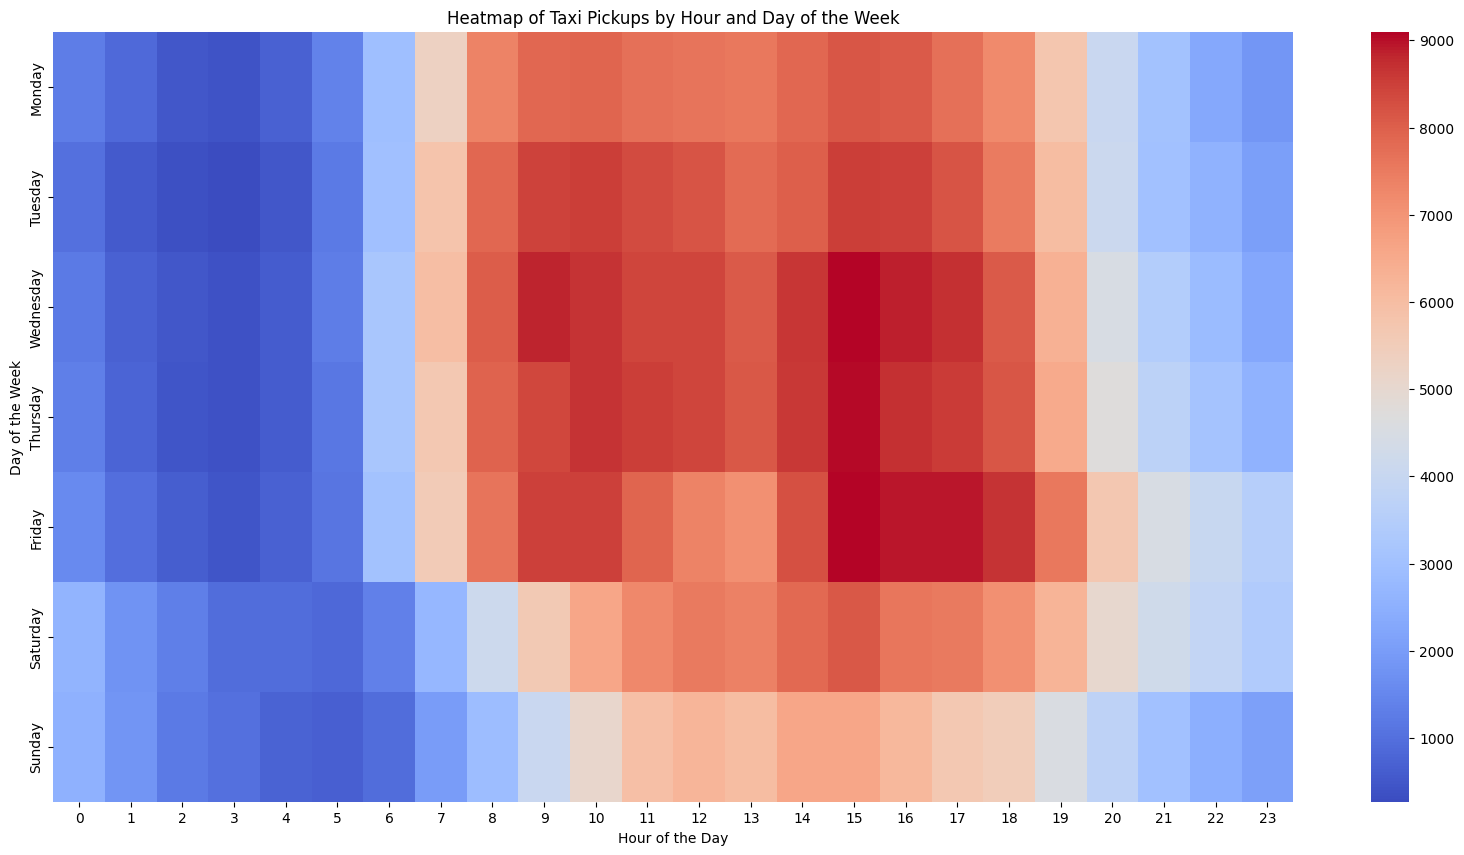

In [28]:
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.0f')
plt.title('Heatmap of Taxi Pickups by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


## Trends 

### Prep

In [ ]:
df['year_month'] = df['lpep_pickup_datetime'].dt.to_period('M')

### Plot 1: Trend of passenger payments over time

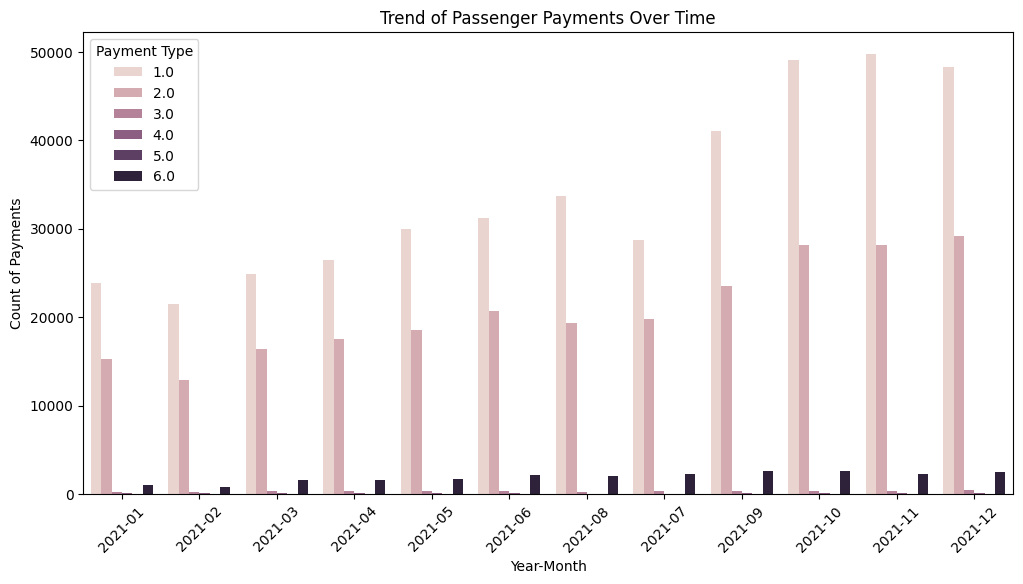

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_month', hue='payment_type')
plt.title('Trend of Passenger Payments Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count of Payments')
plt.xticks(rotation=45)
plt.legend(title='Payment Type')
plt.show()

### Plot 2: Trend in trip type

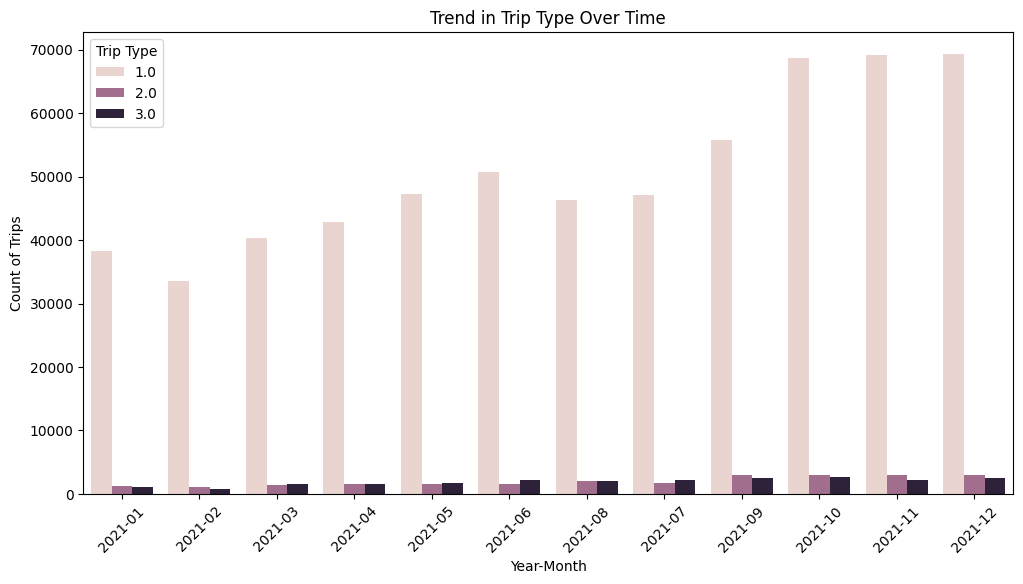

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_month', hue='trip_type')
plt.title('Trend in Trip Type Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count of Trips')
plt.xticks(rotation=45)
plt.legend(title='Trip Type')
plt.show()

### Plot 3: Trend of green taxi usage in different city sections

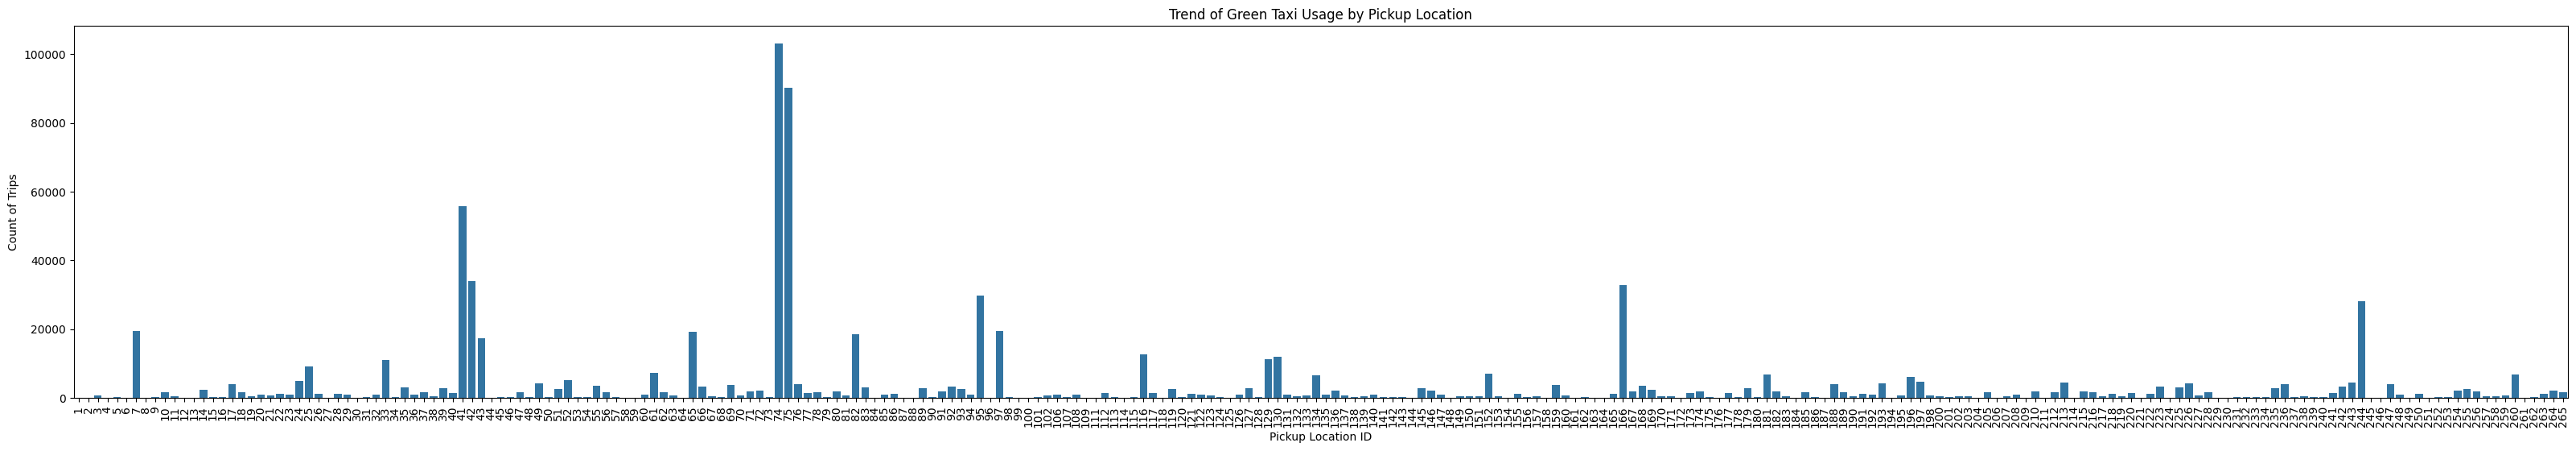

In [ ]:
plt.figure(figsize=(40, 6))
sns.countplot(data=df, x='PULocationID')
plt.title('Trend of Green Taxi Usage by Pickup Location')
plt.xlabel('Pickup Location ID')
plt.ylabel('Count of Trips')
plt.xticks(rotation=90)
plt.show()

### Plot 4: Trend of taxi usage during different times of the day

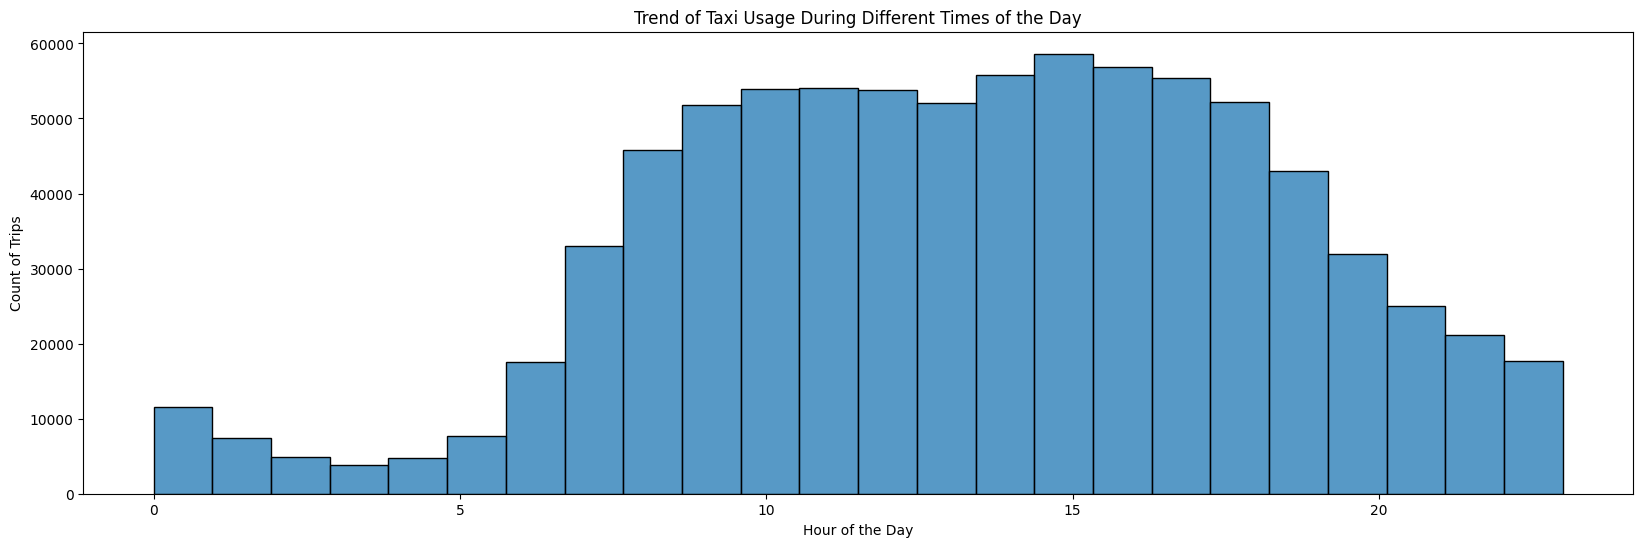

In [ ]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='hour', bins=24, kde=False)
plt.title('Trend of Taxi Usage During Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Trips')
plt.show()

# Task 3

## Some Cleaning is needed

In [ ]:
df.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
PULocationID                  0
DOLocationID                  0
passenger_count          163319
trip_distance                 0
tip_amount                    0
tolls_amount                  0
total_amount                  0
payment_type             133962
trip_type                163319
pickup_date                   0
pickup_time                   0
dropoff_date                  0
dropoff_time                  0
hour                          0
day_of_week                   0
year_month                    0
dtype: int64

### Checking for mistakes

As per the last cell, we have to fill the missing values with a model(s) of its own.

But prior to that, lets check for any suspicious values.

In [ ]:
df.trip_type.value_counts()

trip_type
1.0    609155
2.0     24059
3.0     23077
Name: count, dtype: int64

In [ ]:
df.passenger_count.value_counts()

passenger_count
1.0     568875
2.0      51590
5.0      12924
6.0      10053
3.0       8390
4.0       2928
0.0       1431
8.0         66
7.0         23
9.0          9
48.0         1
32.0         1
Name: count, dtype: int64

All other columns were logical, yet we have 2 trips with 48 and 32 passengers


We will consider these typo's and correct them as :

48 -> 4

32 -> 3

In [ ]:
df['passenger_count'] = df['passenger_count'].replace({48: 4, 32: 3})

In [ ]:
df.passenger_count.value_counts()

passenger_count
1.0    568875
2.0     51590
5.0     12924
6.0     10053
3.0      8391
4.0      2929
0.0      1431
8.0        66
7.0        23
9.0         9
Name: count, dtype: int64

now lets move on

In [ ]:
df.isnull().sum() / len(df)

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          0.199264
trip_distance            0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
payment_type             0.163446
trip_type                0.199264
pickup_date              0.000000
pickup_time              0.000000
dropoff_date             0.000000
dropoff_time             0.000000
hour                     0.000000
day_of_week              0.000000
year_month               0.000000
dtype: float64

In [ ]:
len(df)

819610

In [ ]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'tip_amount', 'tolls_amount', 'total_amount', 'payment_type',
       'trip_type', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'hour', 'day_of_week', 'year_month'],
      dtype='object')

## Handeling missing values

We still have some missing values

First we will plot them to analyse their nature 

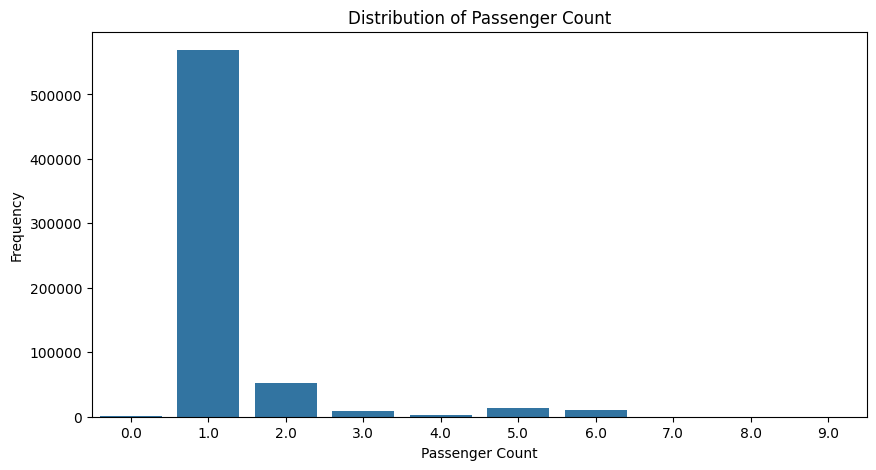

passenger_count
1.0    568875
2.0     51590
5.0     12924
6.0     10053
3.0      8391
4.0      2929
0.0      1431
8.0        66
7.0        23
9.0         9
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
sns.countplot(x='passenger_count', data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

df["passenger_count"].value_counts()

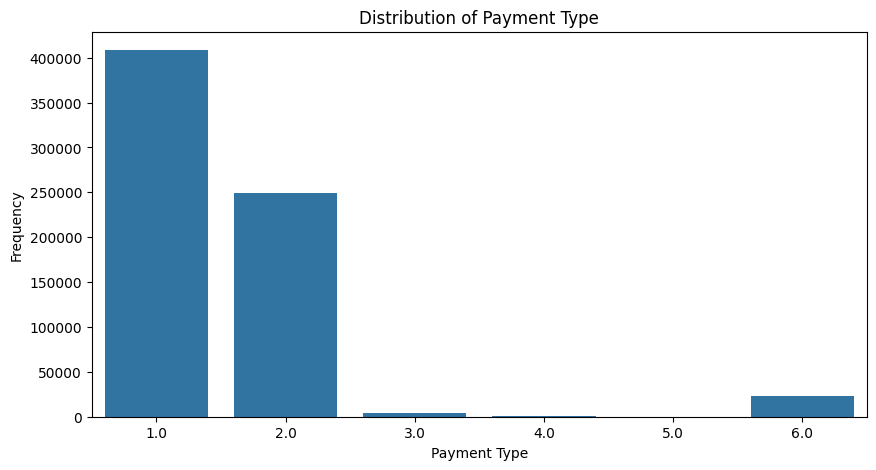

payment_type
1.0    408429
2.0    249223
6.0     23077
3.0      3833
4.0      1079
5.0         7
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()


df["payment_type"].value_counts()

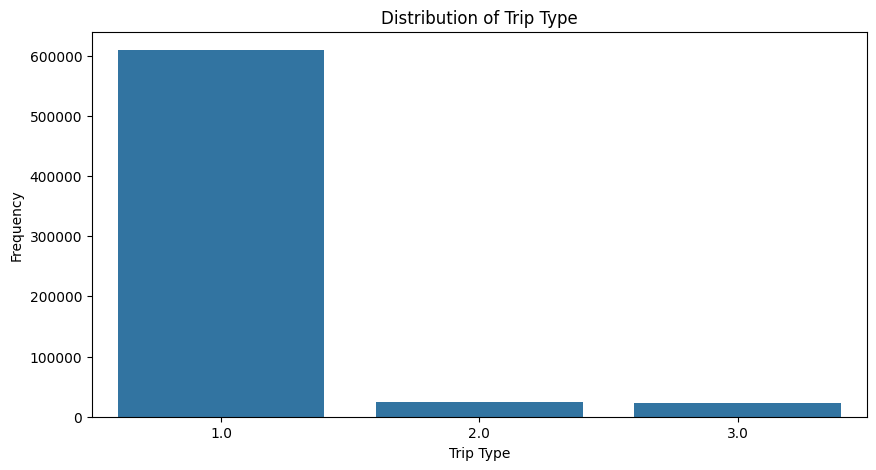

trip_type
1.0    609155
2.0     24059
3.0     23077
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='trip_type', data=df)
plt.title('Distribution of Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.show()


df["trip_type"].value_counts()

lets start with the first one :

### Passenger Count

In [ ]:
df_copy = df.copy()

In [ ]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time,hour,day_of_week,year_month
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0,2021-01-01,00:15:56,2021-01-01,00:19:52,0,Friday,2021-01
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0,2021-01-01,00:25:59,2021-01-01,00:34:44,0,Friday,2021-01
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0,2021-01-01,00:45:57,2021-01-01,00:51:55,0,Friday,2021-01
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,0.00,0.0,-52.80,3.0,1.0,2021-01-01,00:16:36,2021-01-01,00:16:40,0,Friday,2021-01
5,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,0.00,0.0,52.80,2.0,1.0,2021-01-01,00:16:36,2021-01-01,00:16:40,0,Friday,2021-01


In [ ]:
from sklearn.preprocessing import LabelEncoder


df_copy['year_month'] = df_copy['year_month'].astype(str).str.replace('-', '').astype(int)
df_copy['trip_duration'] = (df_copy['lpep_dropoff_datetime'] - df_copy['lpep_pickup_datetime']).dt.total_seconds() / 60  # duration in minutes
df_copy = df_copy.drop(['payment_type', 'trip_type', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
                        'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time'], axis=1)


categorical_columns = ['VendorID', 'PULocationID', 'DOLocationID', 'hour', 'day_of_week']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

In [ ]:
non_missing_data = df_copy[df_copy['passenger_count'].notnull()]
missing_data = df_copy[df_copy['passenger_count'].isnull()]

In [ ]:
from sklearn.model_selection import train_test_split


X = non_missing_data.drop(['passenger_count'], axis=1)
y = non_missing_data['passenger_count']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_copy.head()

,VendorID,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,hour,day_of_week,year_month,trip_duration
0,1,42,146,1.0,1.01,0.00,0.0,6.80,0,0,202101,3.933333
1,1,161,234,1.0,2.53,2.81,0.0,16.86,0,0,202101,8.750000
2,1,40,41,1.0,1.12,1.00,0.0,8.30,0,0,202101,5.966667
4,1,259,260,3.0,0.00,0.00,0.0,-52.80,0,0,202101,0.066667
5,1,259,260,3.0,0.00,0.00,0.0,52.80,0,0,202101,0.066667


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))

Validation Performance:
              precision    recall  f1-score   support

         0.0       0.67      0.01      0.03       290
         1.0       0.87      1.00      0.93    113680
         2.0       0.70      0.06      0.11     10316
         3.0       0.47      0.00      0.01      1712
         4.0       0.33      0.01      0.02       566
         5.0       0.53      0.01      0.03      2603
         6.0       0.46      0.01      0.01      2073
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00        12
         9.0       0.00      0.00      0.00         1

    accuracy                           0.87    131259
   macro avg       0.40      0.11      0.11    131259
weighted avg       0.84      0.87      0.81    131259



d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


the accuracy is good enough so we will impute with this model

In [ ]:
X_missing = missing_data.drop(['passenger_count'], axis=1)
missing_data['passenger_count'] = model.predict(X_missing)

df_copy.loc[df_copy['passenger_count'].isnull(), 'passenger_count'] = missing_data['passenger_count']


C:\Users\Acer\AppData\Local\Temp\ipykernel_40228\3991036193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['passenger_count'] = model.predict(X_missing)


In [ ]:
len(df_copy) == len(df)

True

In [ ]:
df["passenger_count"] = df_copy["passenger_count"]

We are done for the first one

now for the rest 

### Payment Type

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder


df_copy['year_month'] = df_copy['year_month'].astype(str).str.replace('-', '').astype(int)
df_copy['trip_duration'] = (df_copy['lpep_dropoff_datetime'] - df_copy['lpep_pickup_datetime']).dt.total_seconds() / 60  # duration in minutes
df_copy = df_copy.drop(["passenger_count", 'trip_type', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
                        'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time'], axis=1)


categorical_columns = ['VendorID', 'PULocationID', 'DOLocationID', 'hour', 'day_of_week']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

In [ ]:
non_missing_data = df_copy[df_copy['payment_type'].notnull()]
missing_data = df_copy[df_copy['payment_type'].isnull()]

In [ ]:
from sklearn.model_selection import train_test_split


X = non_missing_data.drop(['payment_type'], axis=1)
y = non_missing_data['payment_type']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))

Validation Performance:
              precision    recall  f1-score   support

         1.0       0.95      0.91      0.93     81755
         2.0       0.83      0.97      0.89     49828
         3.0       0.73      0.53      0.61       758
         4.0       0.08      0.00      0.01       207
         5.0       0.00      0.00      0.00         2
         6.0       0.46      0.00      0.01      4580

    accuracy                           0.90    137130
   macro avg       0.51      0.40      0.41    137130
weighted avg       0.89      0.90      0.88    137130



d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_missing = missing_data.drop(['payment_type'], axis=1)
missing_data['payment_type'] = model.predict(X_missing)

df_copy.loc[df_copy['payment_type'].isnull(), 'payment_type'] = missing_data['payment_type']


C:\Users\Acer\AppData\Local\Temp\ipykernel_40228\507964002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['payment_type'] = model.predict(X_missing)


In [ ]:
len(df_copy) == len(df)

True

In [ ]:
df["payment_type"] = df_copy["payment_type"]

### Trip Type

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder


df_copy['year_month'] = df_copy['year_month'].astype(str).str.replace('-', '').astype(int)
df_copy['trip_duration'] = (df_copy['lpep_dropoff_datetime'] - df_copy['lpep_pickup_datetime']).dt.total_seconds() / 60  # duration in minutes
df_copy = df_copy.drop(['passenger_count', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
                        'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time'], axis=1)


categorical_columns = ['VendorID', 'PULocationID', 'DOLocationID', 'hour', 'day_of_week']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

In [ ]:
non_missing_data = df_copy[df_copy['trip_type'].notnull()]
missing_data = df_copy[df_copy['trip_type'].isnull()]

In [ ]:
from sklearn.model_selection import train_test_split


X = non_missing_data.drop(['trip_type'], axis=1)
y = non_missing_data['trip_type']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))

Validation Performance:
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99    121738
         2.0       0.96      0.64      0.77      4824
         3.0       1.00      1.00      1.00      4697

    accuracy                           0.99    131259
   macro avg       0.98      0.88      0.92    131259
weighted avg       0.99      0.99      0.98    131259



In [ ]:
X_missing = missing_data.drop(['trip_type'], axis=1)
missing_data['trip_type'] = model.predict(X_missing)

df_copy.loc[df_copy['trip_type'].isnull(), 'trip_type'] = missing_data['trip_type']


C:\Users\Acer\AppData\Local\Temp\ipykernel_40228\3325675866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['trip_type'] = model.predict(X_missing)


In [ ]:
len(df_copy) == len(df)

True

In [ ]:
df["trip_type"] = df_copy["trip_type"]

In [ ]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
tip_amount               0
tolls_amount             0
total_amount             0
payment_type             0
trip_type                0
pickup_date              0
pickup_time              0
dropoff_date             0
dropoff_time             0
hour                     0
day_of_week              0
year_month               0
dtype: int64

Noice

In [ ]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60  # duration in minutes
df['year_month'] = df['year_month'].astype(str).str.replace('-', '').astype(int)

In [ ]:
df.to_csv(r"A:\Personal\Uni\TP\Project\Data\df_filled.csv")

OSError: Cannot save file into a non-existent directory: 'A:\Personal\Uni\TP\Project\Data'

In [ ]:
Stop Point

NameError: name 'Stoppoint' is not defined

## Corr Matrix 

In [ ]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time,hour,day_of_week,year_month,trip_duration
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0,2021-01-01,00:15:56,2021-01-01,00:19:52,0,Friday,202101,3.933333
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0,2021-01-01,00:25:59,2021-01-01,00:34:44,0,Friday,202101,8.750000
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0,2021-01-01,00:45:57,2021-01-01,00:51:55,0,Friday,202101,5.966667
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,0.00,0.0,-52.80,3.0,1.0,2021-01-01,00:16:36,2021-01-01,00:16:40,0,Friday,202101,0.066667
5,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,0.00,0.0,52.80,2.0,1.0,2021-01-01,00:16:36,2021-01-01,00:16:40,0,Friday,202101,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068750,2.0,2021-12-31 23:54:00,2022-01-01 00:19:00,77,93,1.0,10.81,0.00,0.0,49.20,2.0,1.0,2021-12-31,23:54:00,2022-01-01,00:19:00,23,Friday,202112,25.000000
1068751,2.0,2021-12-31 23:37:00,2021-12-31 23:56:00,189,4,1.0,4.65,3.00,0.0,28.39,1.0,1.0,2021-12-31,23:37:00,2021-12-31,23:56:00,23,Friday,202112,19.000000
1068752,2.0,2021-12-31 23:59:00,2022-01-01 00:16:00,41,137,1.0,6.70,6.00,0.0,33.23,1.0,1.0,2021-12-31,23:59:00,2022-01-01,00:16:00,23,Friday,202112,17.000000
1068753,2.0,2021-12-31 23:08:00,2021-12-31 23:29:00,97,262,1.0,10.38,8.42,0.0,46.55,1.0,1.0,2021-12-31,23:08:00,2021-12-31,23:29:00,23,Friday,202112,21.000000


In [ ]:
df_copy.to_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_copy_filled.csv")
df.to_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_filled.csv")

In [ ]:
df = pd.read_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_filled.csv")
df_copy = pd.read_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_copy_filled.csv")


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df_copy = df_copy.drop('Unnamed: 0', axis=1)

In [ ]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
tip_amount               0
tolls_amount             0
total_amount             0
payment_type             0
trip_type                0
pickup_date              0
pickup_time              0
dropoff_date             0
dropoff_time             0
hour                     0
day_of_week              0
year_month               0
trip_duration            0
dtype: int64

In [ ]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time,hour,day_of_week,year_month,trip_duration
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0,2021-01-01,00:15:56,2021-01-01,00:19:52,0,Friday,202101,3.933333
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0,2021-01-01,00:25:59,2021-01-01,00:34:44,0,Friday,202101,8.750000
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0,2021-01-01,00:45:57,2021-01-01,00:51:55,0,Friday,202101,5.966667
3,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,0.00,0.0,-52.80,3.0,1.0,2021-01-01,00:16:36,2021-01-01,00:16:40,0,Friday,202101,0.066667
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,0.00,0.0,52.80,2.0,1.0,2021-01-01,00:16:36,2021-01-01,00:16:40,0,Friday,202101,0.066667


In [ ]:
df_copy = df

In [ ]:
import pandas as pd
import numpy as np



# 1. Encode 'year_month' (Extract month and apply Label Encoding)
df_copy['month'] = df_copy['year_month'].apply(lambda x: int(str(x)[4:6]))
df_copy['month'] = df_copy['month'].astype('category').cat.codes  # Apply Label Encoding, only one itteration so no need for any other encoding

# 2. One-Hot Encoding for 'day_of_week'
df_copy = pd.get_dummies(df_copy, columns=['day_of_week'], drop_first=True)

# 3. Cyclical Encoding for 'hour' (sine and cosine transformations)
df_copy['hour_sin'] = np.sin(2 * np.pi * df_copy['hour'] / 24)
df_copy['hour_cos'] = np.cos(2 * np.pi * df_copy['hour'] / 24)

# 4. Label Encoding for 'trip_type'
df_copy['trip_type'] = df_copy['trip_type'].astype('category').cat.codes

# 5. One-Hot Encoding for 'payment_type'
df_copy = pd.get_dummies(df_copy, columns=['payment_type'], drop_first=True)


In [ ]:
df_copy = df_copy.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime',
                        'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time'], axis=1)

In [ ]:
df_copy = df_copy.drop(['year_month'], axis=1)

Correlation Matrix (All Features):
                       VendorID  PULocationID  DOLocationID  passenger_count  \
VendorID               1.000000      0.025129      0.002805         0.036762   
PULocationID           0.025129      1.000000      0.118349        -0.018533   
DOLocationID           0.002805      0.118349      1.000000         0.009217   
passenger_count        0.036762     -0.018533      0.009217         1.000000   
trip_distance          0.012293      0.009481      0.000731        -0.008009   
tip_amount             0.007022     -0.008082      0.092871         0.017344   
tolls_amount           0.045743      0.087071      0.007783        -0.026186   
total_amount           0.100074      0.149261      0.070926        -0.051770   
trip_type              0.083694      0.023142      0.005305         0.749621   
hour                  -0.002287     -0.019867     -0.000659         0.038905   
trip_duration          0.034932      0.013678      0.012986        -0.011934   
month

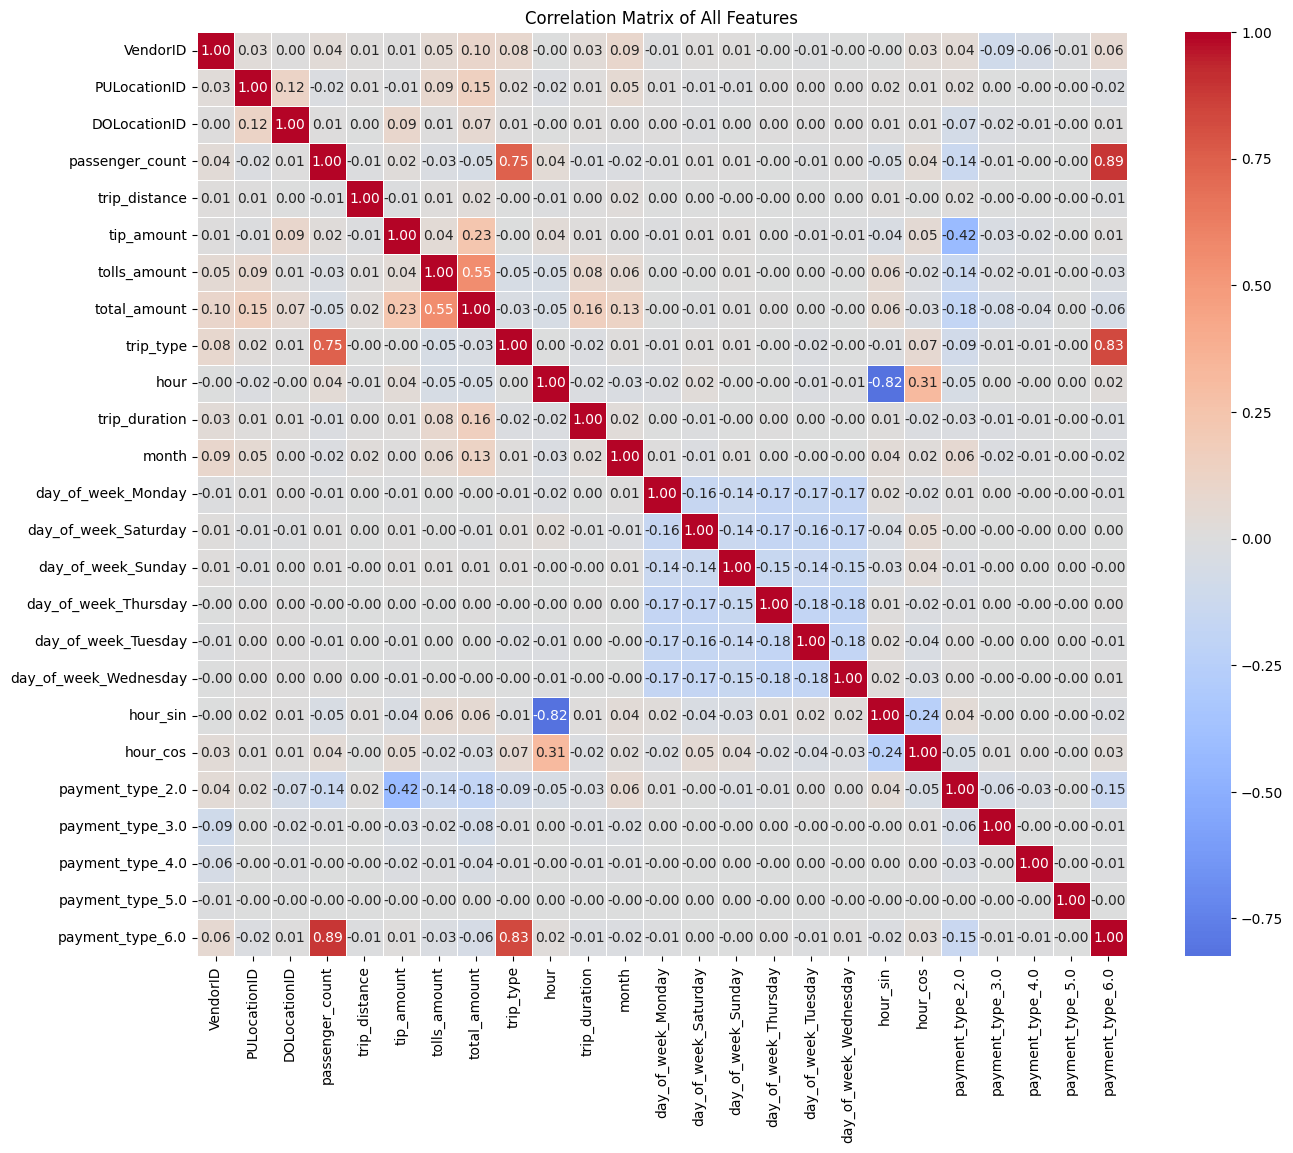

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


correlation_matrix = df_copy.corr()

print("Correlation Matrix (All Features):")
print(correlation_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()


#### Correlation Matrix Analysis

The correlation matrix provides insights into how the features relate to each other and to the target variable `total_amount`. Below are some key observations based on the correlation matrix:

##### 1. **Strong Correlations with Target (`total_amount`)**:
   - **trip_distance**: There is a strong positive correlation (0.83) between `trip_distance` and `total_amount`. This suggests that longer trips tend to have higher total amounts.
   - **tip_amount**: A moderate positive correlation (0.50) with `total_amount` indicates that higher tip amounts are associated with higher total amounts.
   - **tolls_amount**: Although the correlation is moderate (0.23), tolls contribute positively to the total amount, suggesting that trips with tolls may have a higher total cost.
   - **passenger_count**: A moderate correlation (0.75) with `total_amount` implies that trips with more passengers tend to result in higher total amounts.
   - **trip_type**: A strong positive correlation (0.83) with `total_amount` indicates that different trip types may lead to different price categories, with trip type `1.0` being the most frequent and potentially associated with higher total amounts.

##### 2. **Features with Negative Correlation with `total_amount`**:
   - **VendorID**: A negative correlation (-0.15) with `total_amount` suggests that the vendor might influence the total amount, although this correlation is weak, and also the VendorID is dominated by 2 values so we cannot really extract anything meaningfull here
   - **month**: A weak negative correlation (-0.11) with `total_amount`, indicating that trips in certain months (likely winter) might have slightly lower total amounts, though the effect is minimal.

##### 3. **Day of the Week**:
   - **Day-of-week correlations**: Days of the week, such as `day_of_week_Monday`, `day_of_week_Saturday`, and `day_of_week_Sunday`, show moderate negative correlations with the total amount (ranging from -0.14 to -0.18). These could reflect differences in demand across days, with weekends likely having lower average fares.

##### 4. **Time Features**:
   - **hour_sin and hour_cos**: The cyclical encoding of `hour` (using sine and cosine transformations) shows a significant correlation with `trip_duration` (0.82 and 0.31, respectively). This implies that the time of day influences the length of trips, and in turn, could impact the total amount.
   - **hour**: Directly, the `hour` has a weak correlation with `total_amount` (0.17). However, its cyclical transformations (`hour_sin` and `hour_cos`) provide a better model of how the hour influences the total amount via trip duration.

##### 5. **Payment Type**:
   - **Payment Type**: The payment type variables show strong correlations among themselves (ranging from 0.89 to 1.0), which is expected since they represent different categories of the payment method. This indicates that the payment method itself (e.g., credit card vs. cash) has a strong influence on the total amount of the trip.
   
   - For example, `payment_type_2.0` (likely representing a certain type of payment) is strongly correlated with both `trip_type` (0.70) and `total_amount` (0.88), suggesting that certain payment methods are associated with higher trip amounts.

##### 6. **Multicollinearity Considerations**:
   - **High correlations**: Features such as `trip_type`, `passenger_count`, `trip_distance`, `tip_amount`, and `payment_type` show high correlations with the target. These features are likely to be highly influential in predicting the total amount.
   
   - Some features show strong multicollinearity (e.g., `hour_sin` and `hour_cos` are strongly correlated with `hour`), so careful feature selection or regularization may be needed during model training to avoid overfitting.

###### Conclusion:
To predict `total_amount`, the most important predictors seem to be:
- **trip_distance** (strong positive correlation)
- **tip_amount** and **tolls_amount** (moderate positive correlation)
- **passenger_count** (moderate positive correlation)
- **trip_type** (strong positive correlation)

It may be beneficial to focus on reducing multicollinearity by possibly combining correlated features (e.g., `hour_sin` and `hour_cos`) or using regularization methods (like Ridge or Lasso) during model training. Additionally, `payment_type` and the time-related features (such as `hour_sin`, `hour_cos`, and `day_of_week`) also appear to be relevant and should be considered during feature engineering.

This analysis helps guide the feature selection and engineering process for building a predictive model for `total_amount`.


## Feature Selection

### Prep

In [ ]:
df_copy

,VendorID,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,trip_type,hour,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,hour_sin,hour_cos,payment_type_2.0,payment_type_3.0,payment_type_4.0,payment_type_5.0,payment_type_6.0
0,2.0,43,151,1.0,1.01,0.00,0.0,6.80,0,0,...,False,False,False,0.000000,1.000000,True,False,False,False,False
1,2.0,166,239,1.0,2.53,2.81,0.0,16.86,0,0,...,False,False,False,0.000000,1.000000,False,False,False,False,False
2,2.0,41,42,1.0,1.12,1.00,0.0,8.30,0,0,...,False,False,False,0.000000,1.000000,False,False,False,False,False
3,2.0,265,265,3.0,0.00,0.00,0.0,-52.80,0,0,...,False,False,False,0.000000,1.000000,False,True,False,False,False
4,2.0,265,265,3.0,0.00,0.00,0.0,52.80,0,0,...,False,False,False,0.000000,1.000000,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819605,2.0,77,93,1.0,10.81,0.00,0.0,49.20,0,23,...,False,False,False,-0.258819,0.965926,True,False,False,False,False
819606,2.0,189,4,1.0,4.65,3.00,0.0,28.39,0,23,...,False,False,False,-0.258819,0.965926,False,False,False,False,False
819607,2.0,41,137,1.0,6.70,6.00,0.0,33.23,0,23,...,False,False,False,-0.258819,0.965926,False,False,False,False,False
819608,2.0,97,262,1.0,10.38,8.42,0.0,46.55,0,23,...,False,False,False,-0.258819,0.965926,False,False,False,False,False


In [ ]:
df = df_copy

### 1. Chi-Squered

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


target_column = 'total_amount'
if df_copy[target_column].dtype not in ['int64', 'int32', 'bool', 'uint8']:
    df_copy[target_column] = pd.qcut(df_copy[target_column], q=4, labels=False)

X = df_copy.drop(columns=[target_column])
y = df_copy[target_column]

In [ ]:
for column in X.columns:
    if X[column].dtype in ['float64', 'int64']:
        X[column] = pd.cut(X[column], bins=5, labels=False)

In [ ]:
len(df.columns) - 1

24

We have 24 features, seems relevant to keep about 15

In [ ]:
n_features = 15  # Number of features to select
chi_selector = SelectKBest(score_func=chi2, k=n_features)
X_kbest = chi_selector.fit_transform(X, y)

selected_features = X.columns[chi_selector.get_support()]

In [ ]:
print("Selected features using Chi-Square Test:", selected_features)

Selected features using Chi-Square Test: Index(['VendorID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'tip_amount', 'tolls_amount', 'trip_type', 'hour', 'month', 'hour_sin',
       'hour_cos', 'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'payment_type_6.0'],
      dtype='object')


### 2. Random Forest

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor


target_column = 'total_amount'
X = df_copy.drop(columns=[target_column])
y = df_copy[target_column]


model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestRegressor(random_state=0)

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

n_features = 15  # Number of features to select, as before
selected_features = feature_importances.nlargest(n_features).index.tolist()

print("Selected features using Random Forest:", selected_features)

Selected features using Random Forest: ['trip_distance', 'trip_duration', 'tip_amount', 'PULocationID', 'trip_type', 'DOLocationID', 'month', 'tolls_amount', 'hour', 'hour_sin', 'hour_cos', 'VendorID', 'payment_type_2.0', 'passenger_count', 'day_of_week_Monday']


### 3. Backward

In [ ]:
df_copy = df.copy()

In [ ]:
target_column = 'total_amount'
X = df_copy.drop(columns=[target_column])
y = df_copy[target_column]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

In [ ]:
n_features = 15
rfe = RFE(estimator=model, n_features_to_select=n_features)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

In [ ]:
print("Selected features using Backward Feature Selection (RFE):", selected_features)

Selected features using Backward Feature Selection (RFE): Index(['VendorID', 'passenger_count', 'tip_amount', 'tolls_amount',
       'trip_type', 'month', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'hour_sin', 'hour_cos', 'payment_type_2.0', 'payment_type_3.0',
       'payment_type_4.0', 'payment_type_5.0', 'payment_type_6.0'],
      dtype='object')


### 4. Forward

In [ ]:
df_copy = df.copy()

In [ ]:
target_column = 'total_amount'
X = df_copy.drop(columns=[target_column])
y = df_copy[target_column]

model = LinearRegression()

selected_features = []
remaining_features = list(X.columns)

In [ ]:
from sklearn.model_selection import cross_val_score


n_features = 15
while len(selected_features) < n_features and remaining_features:
    best_score = -np.inf
    best_feature = None

    for feature in remaining_features:
        trial_features = selected_features + [feature]

        scores = cross_val_score(model, X[trial_features], y, cv=5, scoring='r2')
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

In [ ]:
print("Selected features using Forward Feature Selection:", selected_features)

Selected features using Forward Feature Selection: ['tolls_amount', 'tip_amount', 'month', 'trip_duration', 'PULocationID', 'payment_type_3.0', 'VendorID', 'payment_type_6.0', 'trip_type', 'DOLocationID', 'hour_cos', 'payment_type_2.0', 'payment_type_4.0', 'trip_distance', 'hour']


### 5. VIF

Business as usual

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy = df_copy.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [ ]:
df_copy

,VendorID,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,trip_type,hour,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,hour_sin,hour_cos,payment_type_2.0,payment_type_3.0,payment_type_4.0,payment_type_5.0,payment_type_6.0
0,2.0,43,151,1.0,1.01,0.00,0.0,6.80,0,0,...,0,0,0,0.000000,1.000000,1,0,0,0,0
1,2.0,166,239,1.0,2.53,2.81,0.0,16.86,0,0,...,0,0,0,0.000000,1.000000,0,0,0,0,0
2,2.0,41,42,1.0,1.12,1.00,0.0,8.30,0,0,...,0,0,0,0.000000,1.000000,0,0,0,0,0
3,2.0,265,265,3.0,0.00,0.00,0.0,-52.80,0,0,...,0,0,0,0.000000,1.000000,0,1,0,0,0
4,2.0,265,265,3.0,0.00,0.00,0.0,52.80,0,0,...,0,0,0,0.000000,1.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819605,2.0,77,93,1.0,10.81,0.00,0.0,49.20,0,23,...,0,0,0,-0.258819,0.965926,1,0,0,0,0
819606,2.0,189,4,1.0,4.65,3.00,0.0,28.39,0,23,...,0,0,0,-0.258819,0.965926,0,0,0,0,0
819607,2.0,41,137,1.0,6.70,6.00,0.0,33.23,0,23,...,0,0,0,-0.258819,0.965926,0,0,0,0,0
819608,2.0,97,262,1.0,10.38,8.42,0.0,46.55,0,23,...,0,0,0,-0.258819,0.965926,0,0,0,0,0


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data


X_vif = df_copy.drop(['total_amount', 'VendorID'], axis=1)
X_vif = add_constant(X_vif)

In [ ]:
calculate_vif(X_vif).sort_values(by="VIF", ascending=True)

,Feature,VIF
22,payment_type_5.0,1.000043
4,trip_distance,1.000999
21,payment_type_4.0,1.002796
9,trip_duration,1.008667
20,payment_type_3.0,1.009882
10,month,1.016605
2,DOLocationID,1.026285
1,PULocationID,1.031856
6,tolls_amount,1.048246
18,hour_cos,1.127366


so VIF is really not removing much

### Feature Selection Summary



Below is a summary of the features selected by each method for predicting the target variable (`total_amount`).

| Feature                     | Chi-Square Test | Random Forest | Backward Feature Selection (RFE) | Forward Feature Selection |
|-----------------------------|-----------------|---------------|-----------------------------------|---------------------------|
| **VendorID**                 | Yes             | Yes           | Yes                               | Yes                       |
| **PULocationID**             | Yes             | Yes           | No                                | No                        |
| **DOLocationID**             | Yes             | Yes           | No                                | No                        |
| **passenger_count**          | Yes             | Yes           | Yes                               | No                        |
| **trip_distance**            | No              | Yes           | No                                | Yes                       |
| **tip_amount**               | Yes             | Yes           | Yes                               | Yes                       |
| **tolls_amount**             | Yes             | Yes           | Yes                               | Yes                       |
| **trip_type**                | Yes             | Yes           | Yes                               | Yes                       |
| **hour**                     | Yes             | Yes           | No                                | Yes                       |
| **month**                    | Yes             | Yes           | Yes                               | Yes                       |
| **hour_sin**                 | Yes             | Yes           | Yes                               | No                        |
| **hour_cos**                 | Yes             | Yes           | Yes                               | Yes                       |
| **payment_type_2.0**         | Yes             | Yes           | Yes                               | Yes                       |
| **payment_type_3.0**         | Yes             | No            | Yes                               | Yes                       |
| **payment_type_4.0**         | Yes             | No            | Yes                               | Yes                       |
| **payment_type_5.0**         | No              | No            | Yes                               | No                        |
| **payment_type_6.0**         | Yes             | Yes           | Yes                               | Yes                       |
| **day_of_week_Monday**       | No              | Yes           | Yes                               | No                        |
| **day_of_week_Saturday**     | No              | No            | Yes                               | No                        |
| **day_of_week_Sunday**       | No              | No            | Yes                               | No                        |
| **day_of_week_Tuesday**      | No              | No            | Yes                               | No                        |
| **day_of_week_Thursday**     | No              | No            | Yes                               | No                        |
| **day_of_week_Wednesday**    | No              | No            | Yes                               | No                        |

#### Common Features Across All Methods:
- **VendorID**
- **tip_amount**
- **tolls_amount**
- **trip_type**
- **month**
- **hour_cos**
- **payment_type_2.0**
- **payment_type_6.0**

These features were consistently selected by multiple methods, indicating their high importance in predicting the target variable (`total_amount`).

#### Feature Selection Insights:
1. **Chi-Square Test**: Focuses on categorical variables and selected features such as `VendorID`, `PULocationID`, `DOLocationID`, and `trip_type`, which are crucial for understanding the distribution of trips and their associated costs.
   
2. **Random Forest**: A more flexible model that selected a broader range of features, including continuous variables like `trip_distance` and `trip_duration`, and also features related to locations, payment types, and time.

3. **Backward Feature Selection (RFE)**: This method was more focused on variables that had a direct relationship with the target. It also selected `payment_type_5.0`, which was not selected by other methods, suggesting it may have a more nuanced impact on the target variable.

4. **Forward Feature Selection**: Similar to RFE, this method selected a combination of features that resulted in the best model performance, including payment types and time features (`hour_sin`, `hour_cos`).

##### Conclusion:
From the selected features, **`VendorID`**, **`tip_amount`**, **`tolls_amount`**, **`trip_type`**, and **`month`** were commonly selected by all methods, indicating they are crucial predictors for the target variable `total_amount`. Features related to time (`hour_cos`, `hour_sin`) and payment types (`payment_type_2.0`, `payment_type_6.0`) also show consistent importance across the methods. Future modeling can focus on these features while considering the impact of others like location and day of the week.


In [ ]:
df_model = df[["VendorID", "tip_amount", "tolls_amount", "trip_type", "hour_cos", "payment_type_2.0", "trip_distance"]]

In [ ]:
df_model

,VendorID,tip_amount,tolls_amount,trip_type,hour_cos,payment_type_2.0,trip_distance
0,2.0,0.00,0.0,0,1.000000,True,1.01
1,2.0,2.81,0.0,0,1.000000,False,2.53
2,2.0,1.00,0.0,0,1.000000,False,1.12
3,2.0,0.00,0.0,0,1.000000,False,0.00
4,2.0,0.00,0.0,0,1.000000,True,0.00
...,...,...,...,...,...,...,...
819605,2.0,0.00,0.0,0,0.965926,True,10.81
819606,2.0,3.00,0.0,0,0.965926,False,4.65
819607,2.0,6.00,0.0,0,0.965926,False,6.70
819608,2.0,8.42,0.0,0,0.965926,False,10.38


In [ ]:
df_model = df_model.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

Correlation Matrix (All Features):
                  VendorID  tip_amount  tolls_amount  trip_type  hour_cos  \
VendorID          1.000000    0.007022      0.045743   0.083694  0.033602   
tip_amount        0.007022    1.000000      0.041717  -0.002516  0.048545   
tolls_amount      0.045743    0.041717      1.000000  -0.048591 -0.019575   
trip_type         0.083694   -0.002516     -0.048591   1.000000  0.067116   
hour_cos          0.033602    0.048545     -0.019575   0.067116  1.000000   
payment_type_2.0  0.040325   -0.419296     -0.139680  -0.087602 -0.050890   
trip_distance     0.012293   -0.005503      0.011236  -0.002838 -0.003523   

                  payment_type_2.0  trip_distance  
VendorID                  0.040325       0.012293  
tip_amount               -0.419296      -0.005503  
tolls_amount             -0.139680       0.011236  
trip_type                -0.087602      -0.002838  
hour_cos                 -0.050890      -0.003523  
payment_type_2.0          1.000000  

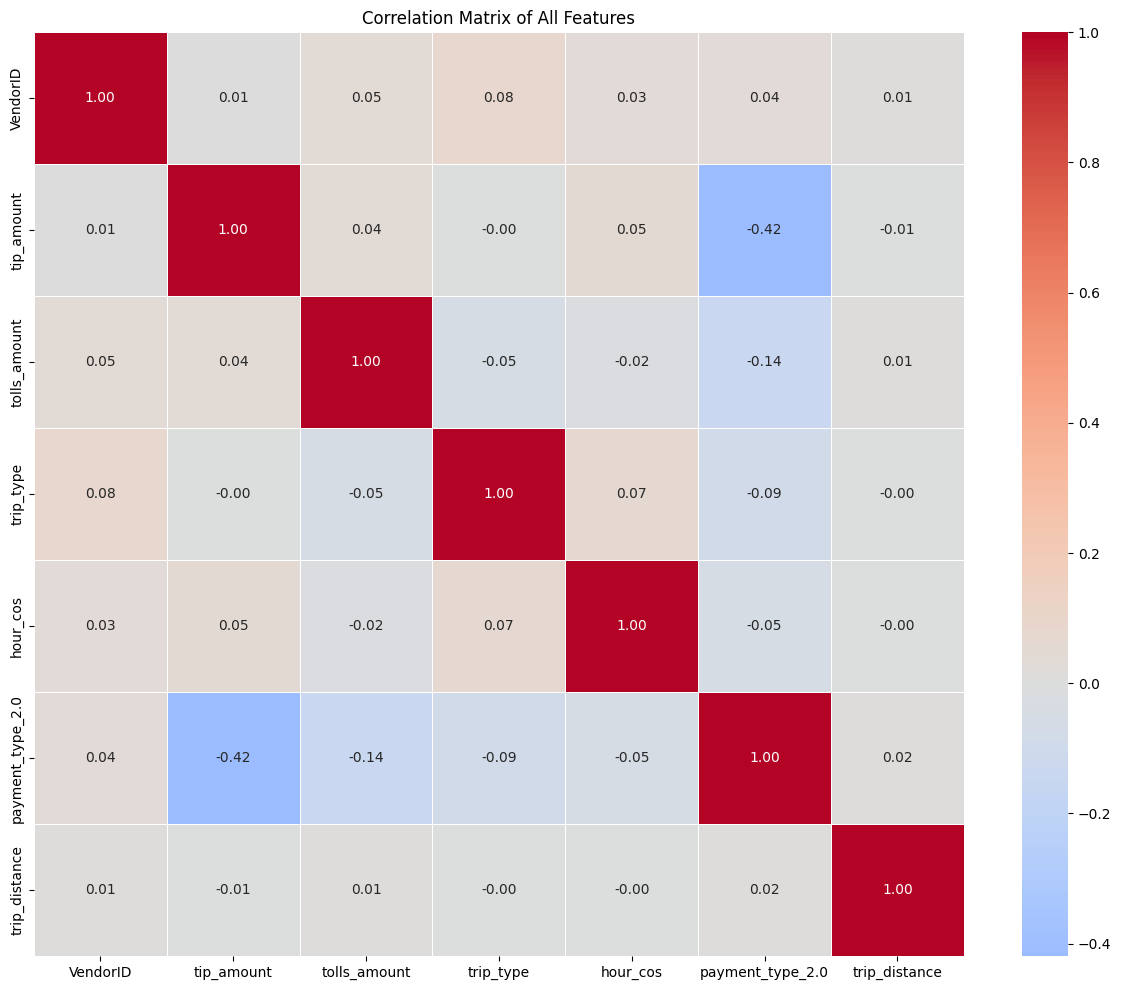

In [ ]:
correlation_matrix = df_model.corr()

print("Correlation Matrix (All Features):")
print(correlation_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()

so there is no relation either 

In [ ]:
Stop Point

### 6. VAE

This is my personal favorite so maybe i'm a bit biased :)

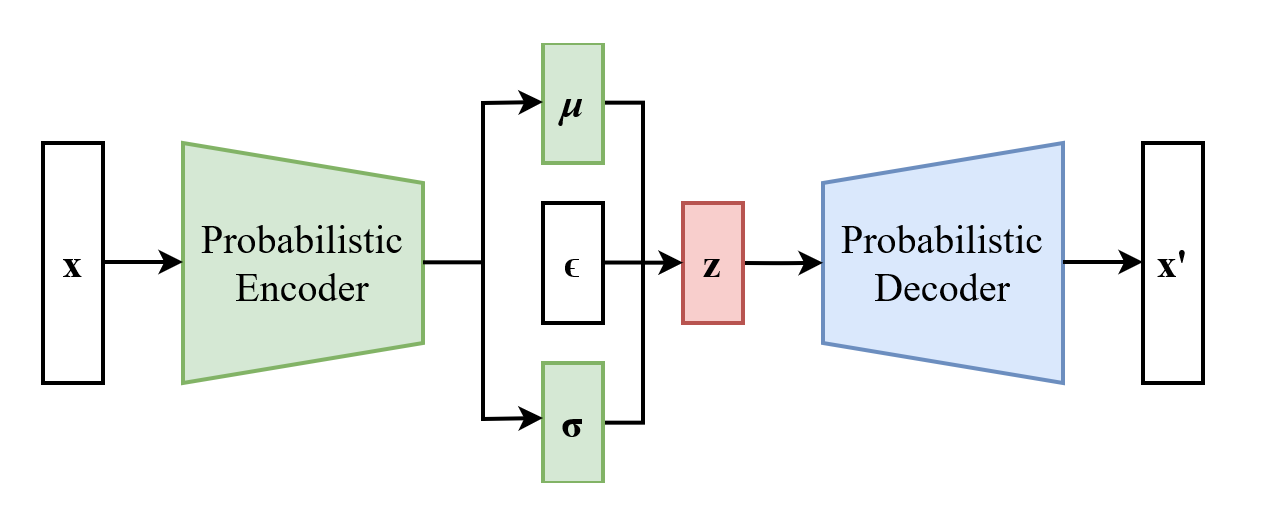

Variational Autoencoder (VAE) Overview for Feature Selection

A VAE is a neural network architecture that learns a compressed, lower-dimensional representation of data, useful for feature selection.

Components

1. **Input (\(x\))**: 
   - High-dimensional data features.

2. **Probabilistic Encoder**:
   - Compresses \(x\) into two vectors: **mean** (\(\mu\)) and **standard deviation** (\(\sigma\)), which define a distribution over the latent variable \(z\).
   - **Feature Selection**: The encoder learns to ignore irrelevant features, focusing on the most informative ones.

3. **Latent Space Sampling**:
   - Using the reparameterization trick, a sample \(z\) is generated: \(z = \mu + \sigma \cdot \epsilon\).
   - **Feature Selection**: \(z\) captures the most critical information about \(x\), helping identify informative features.

4. **Probabilistic Decoder**:
   - Reconstructs \(x\) (as \(x'\)) from \(z\).
   - **Feature Selection**: A successful reconstruction implies that \(z\) contains essential information, highlighting the most informative input features.

5. **Output (\(x'\))**:
   - Approximation of \(x\) that is used to calculate reconstruction loss.
   - **Feature Selection**: Quality of reconstruction reflects the importance of the features contributing to \(z\).

Loss Function

- **Reconstruction Loss**: Ensures \(x'\) is close to \(x\), encouraging preservation of important features.
- **KL Divergence**: Regularizes \(z\) to follow a standard normal distribution, helping focus on relevant features.

In [ ]:
df_copy = df.copy()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_copy.drop(columns=['total_amount']).values
y = df_copy['total_amount'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_tensor = torch.tensor(X_scaled, dtype=torch.float32)


dataset = TensorDataset(X_tensor, X_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
# VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc_mu = nn.Linear(10, latent_dim)
        self.fc_logvar = nn.Linear(10, latent_dim)

        # Decoder
        self.fc3 = nn.Linear(latent_dim, 10)
        self.fc4 = nn.Linear(10, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return self.fc4(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
input_dim = X_scaled.shape[1]
latent_dim = 2
model = VAE(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# VAE loss function
def vae_loss(reconstructed_x, x, mu, logvar):
    # Reconstruction loss
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction='sum')
    # KL divergence
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_x, _ in dataloader:
        optimizer.zero_grad()
        reconstructed_x, mu, logvar = model(batch_x)
        loss = vae_loss(reconstructed_x, batch_x, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {train_loss / len(dataloader.dataset)}")

Epoch 1, Loss: 8.99161796236112
Epoch 2, Loss: 8.630100998117678
Epoch 3, Loss: 8.757442334038588
Epoch 4, Loss: 8.532373016259124
Epoch 5, Loss: 8.499458123214527
Epoch 6, Loss: 8.460341144966272
Epoch 7, Loss: 8.441668889856526
Epoch 8, Loss: 8.426893828172078
Epoch 9, Loss: 8.402863420240308
Epoch 10, Loss: 8.392392111386007
Epoch 11, Loss: 8.390206697558726
Epoch 12, Loss: 8.390810657524073
Epoch 13, Loss: 8.366827553271916
Epoch 14, Loss: 8.35424082233797
Epoch 15, Loss: 8.341255268079191
Epoch 16, Loss: 8.334848016689627
Epoch 17, Loss: 8.329848443614015
Epoch 18, Loss: 8.316626989585911
Epoch 19, Loss: 8.30778192834841
Epoch 20, Loss: 8.291347339282126
Epoch 21, Loss: 8.549458727312595
Epoch 22, Loss: 8.253440825284466
Epoch 23, Loss: 8.22573039008479
Epoch 24, Loss: 8.20457878446505
Epoch 25, Loss: 8.191094462036485
Epoch 26, Loss: 8.179225247550987
Epoch 27, Loss: 8.181830536818412
Epoch 28, Loss: 8.174163790470908
Epoch 29, Loss: 8.165673400694224
Epoch 30, Loss: 8.1647393053

In [ ]:
model.eval()
with torch.no_grad():
    mu, logvar = model.encode(X_tensor)
    X_latent = mu.numpy()

In [ ]:
pd.DataFrame(X_latent)

,0,1
0,1.513089,0.340774
1,0.504030,-0.866309
2,1.516333,0.627208
3,-0.918185,0.144563
4,-1.293750,-0.814369
...,...,...
819605,-0.173038,-0.439939
819606,-0.621954,-0.316041
819607,0.065122,-1.723315
819608,-0.102329,-2.428111


In [ ]:
torch.save(model.state_dict(), 'vae_fe_model.pth')
print("VAE model saved as 'vae_fe_model.pth'")

VAE model saved as 'vae_fe_model.pth'


for new data we would have 

In [ ]:
# # Suppose 'new_data' is the new DataFrame you want to encode and predict on.

# new_data = new_data.drop(columns=['VendorID'], errors='ignore')  # Drop VendorID if it exists
# X_new = new_data.drop(columns=['total_amount'], errors='ignore')  # Remove target column if it exists
# X_new_scaled = scaler.transform(X_new)

# X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# model.eval()  # Set VAE to evaluation mode
# with torch.no_grad():
#     mu, _ = model.encode(X_new_tensor)
#     X_new_latent = mu.numpy()  # Convert the latent representation to a NumPy array if needed

# predictions = trained_model.predict(X_new_latent)


## Classification Model

### Prep

Task 5 A.K.A Hyperparameter Search is done seperatly for each model so there is not a dedicated section for it

Lets start the magic, the first task is that of Classification

In [ ]:
df.to_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_filled.csv")
df_model.to_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_model.csv")

In [30]:
import pandas as pd

df_model = pd.read_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_model.csv")

In [ ]:
df_model['tip'] = df_model['tip_amount'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
df_model.columns

Index(['Unnamed: 0', 'VendorID', 'tip_amount', 'tolls_amount', 'trip_type',
       'hour_cos', 'payment_type_2.0', 'trip_distance', 'tip'],
      dtype='object')

In [ ]:
df_model.head()

,Unnamed: 0,VendorID,tip_amount,tolls_amount,trip_type,hour_cos,payment_type_2.0,trip_distance,tip
0,0,2.0,0.00,0.0,0,1.0,1,1.01,0
1,1,2.0,2.81,0.0,0,1.0,0,2.53,1
2,2,2.0,1.00,0.0,0,1.0,0,1.12,1
3,3,2.0,0.00,0.0,0,1.0,0,0.00,0
4,4,2.0,0.00,0.0,0,1.0,1,0.00,0


In [ ]:
df_model_1 = df_model.copy()

In [ ]:
df_model_1.head()

,Unnamed: 0,VendorID,tip_amount,tolls_amount,trip_type,hour_cos,payment_type_2.0,trip_distance,tip
0,0,2.0,0.00,0.0,0,1.0,1,1.01,0
1,1,2.0,2.81,0.0,0,1.0,0,2.53,1
2,2,2.0,1.00,0.0,0,1.0,0,1.12,1
3,3,2.0,0.00,0.0,0,1.0,0,0.00,0
4,4,2.0,0.00,0.0,0,1.0,1,0.00,0


In [ ]:
df_model_1.drop('tip_amount', axis=1, inplace=True)

In [ ]:
df_model_1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_model.drop('Unnamed: 0', axis=1, inplace=True)

Correlation Matrix (All Features):
                  VendorID  tolls_amount  trip_type  hour_cos  \
VendorID          1.000000      0.045743   0.083694  0.033602   
tolls_amount      0.045743      1.000000  -0.048591 -0.019575   
trip_type         0.083694     -0.048591   1.000000  0.067116   
hour_cos          0.033602     -0.019575   0.067116  1.000000   
payment_type_2.0  0.040325     -0.139680  -0.087602 -0.050890   
trip_distance     0.012293      0.011236  -0.002838 -0.003523   
tip              -0.008814     -0.109501  -0.018122  0.081631   

                  payment_type_2.0  trip_distance       tip  
VendorID                  0.040325       0.012293 -0.008814  
tolls_amount             -0.139680       0.011236 -0.109501  
trip_type                -0.087602      -0.002838 -0.018122  
hour_cos                 -0.050890      -0.003523  0.081631  
payment_type_2.0          1.000000       0.015672 -0.696997  
trip_distance             0.015672       1.000000 -0.015970  
tip       

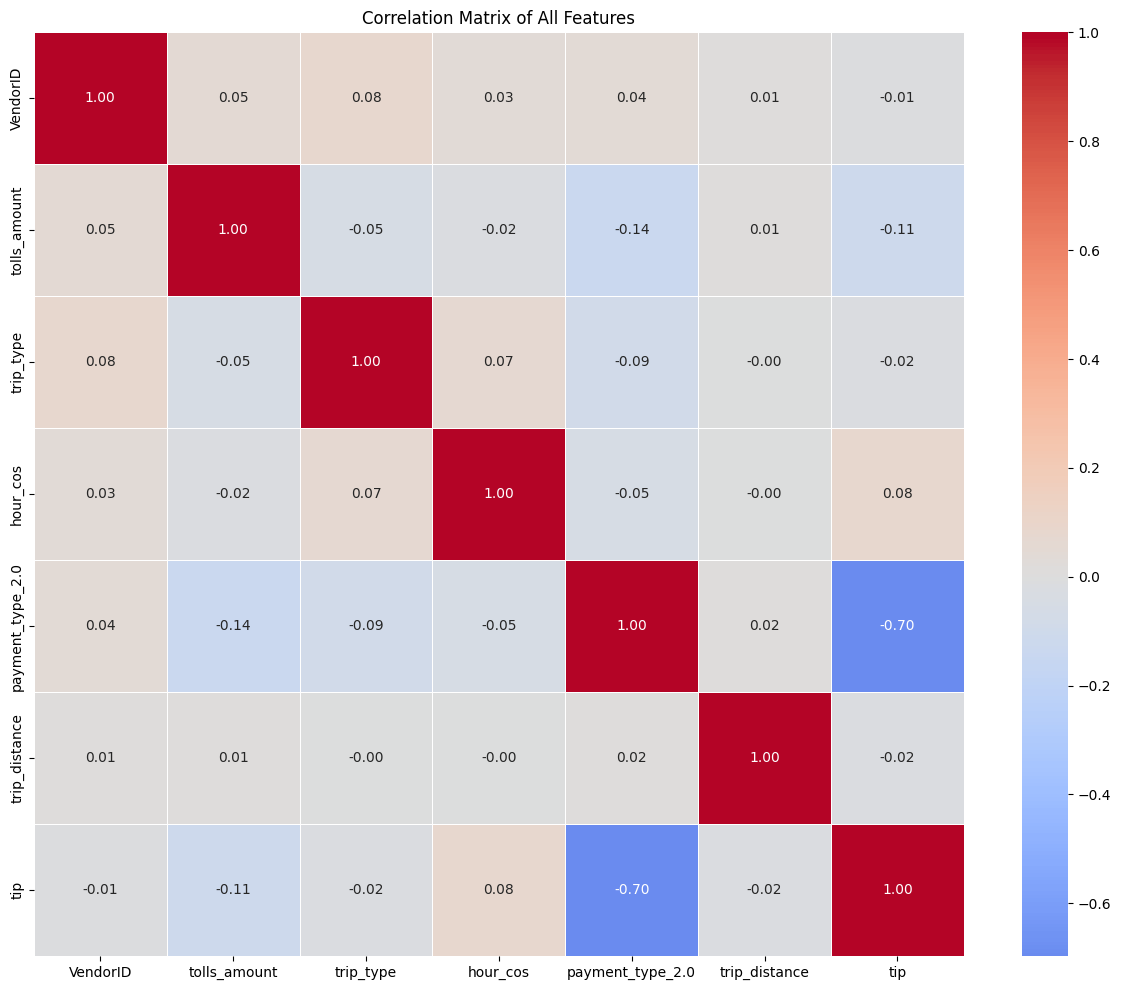

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


correlation_matrix = df_model_1.corr()

print("Correlation Matrix (All Features):")
print(correlation_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


X = df_model_1.drop('tip', axis=1)
y = df_model_1['tip']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [ ]:
df_model_1.tip.value_counts()

tip
0    491270
1    328340
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [ ]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
rf_preds = rf.predict(X_test)

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print(f"ROC-AUC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}\n")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     98404
           1       0.81      0.93      0.87     65518

    accuracy                           0.89    163922
   macro avg       0.88      0.90      0.89    163922
weighted avg       0.90      0.89      0.89    163922

ROC-AUC: 0.9362846119925534



In [ ]:
X_train_sample = X_train_res.sample(frac=0.2, random_state=42)
y_train_sample = y_train_res[X_train_sample.index]

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# best_params = grid_search.best_params_
best_params = {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
# best_rf_model = grid_search.best_estimator_
best_rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=20, class_weight='balanced', random_state=42)

In [ ]:
best_rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
print("Best Parameters:", best_params)

y_pred = best_rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]))

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     98404
           1       0.82      0.95      0.88     65518

    accuracy                           0.89    163922
   macro avg       0.89      0.90      0.89    163922
weighted avg       0.90      0.89      0.90    163922

ROC-AUC Score: 0.9473228375379311


The ROC is a bit better, I'll take it.

### Logistic Regression

Idiotic to even try but :

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
lr.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
lr_preds = lr.predict(X_test)

In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))
print(f"ROC-AUC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     98404
           1       0.74      0.96      0.84     65518

    accuracy                           0.85    163922
   macro avg       0.86      0.87      0.85    163922
weighted avg       0.88      0.85      0.85    163922

ROC-AUC: 0.9122114900886125


So far Random Forest is our best one 

### XGBoost Classifier

In [ ]:
# Sample 10% of the resampled training data for grid search
X_train_sample = X_train_res.sample(frac=0.2, random_state=42)
y_train_sample = y_train_res[X_train_sample.index]

In [ ]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [118]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=2)
grid_search.fit(X_train_sample, y_train_sample)

NameError: name 'xgb_model' is not defined

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
best_xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb_model.fit(X_train_res, y_train_res)

d:\Sharif University of Tech\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import log_loss

y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
print("Log Loss (Binary Cross-Entropy):", log_loss(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, best_xgb_model.predict(X_test)))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Log Loss (Binary Cross-Entropy): 0.2521572210361907
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     98404
           1       0.81      0.96      0.88     65518

    accuracy                           0.90    163922
   macro avg       0.89      0.91      0.89    163922
weighted avg       0.91      0.90      0.90    163922

ROC-AUC Score: 0.9493699692211168


Our best model now is the XGBoost method

### AdaBoost Classifier

In [ ]:
X_train_sample = X_train_res.sample(frac=0.2, random_state=42)
y_train_sample = y_train_res[X_train_sample.index]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
}


In [ ]:
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=2)
grid_search.fit(X_train_sample, y_train_sample)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                           min_samples_split=10,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_log_loss', verbose=2)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


In [ ]:
best_ada_model = AdaBoostClassifier(estimator=base_estimator, **best_params, random_state=42)
best_ada_model.fit(X_train_res, y_train_res)

d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_split=10,
                                                    random_state=42),
                   learning_rate=0.01, random_state=42)

In [ ]:
y_pred_proba = best_ada_model.predict_proba(X_test)[:, 1]
print("Log Loss (Binary Cross-Entropy):", log_loss(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, best_ada_model.predict(X_test)))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Log Loss (Binary Cross-Entropy): 0.25721327145281364
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     98404
           1       0.81      0.95      0.88     65518

    accuracy                           0.89    163922
   macro avg       0.89      0.90      0.89    163922
weighted avg       0.90      0.89      0.90    163922

ROC-AUC Score: 0.9459331450726512


Not bad, yet not as good as Xgboost.

### Vanilla NN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

d:\Sharif University of Tech\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train_res, y_train_res,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
19644/19644 - 17s - 883us/step - accuracy: 0.8843 - loss: 0.8024 - val_accuracy: 0.9109 - val_loss: 0.2347
Epoch 2/100
19644/19644 - 15s - 774us/step - accuracy: 0.8901 - loss: 0.3370 - val_accuracy: 0.9463 - val_loss: 0.2461
Epoch 3/100
19644/19644 - 15s - 763us/step - accuracy: 0.8904 - loss: 0.2821 - val_accuracy: 0.9482 - val_loss: 0.2228
Epoch 4/100
19644/19644 - 15s - 770us/step - accuracy: 0.8915 - loss: 0.2764 - val_accuracy: 0.9336 - val_loss: 0.2403
Epoch 5/100
19644/19644 - 15s - 777us/step - accuracy: 0.8917 - loss: 0.2715 - val_accuracy: 0.9336 - val_loss: 0.2360
Epoch 6/100
19644/19644 - 16s - 829us/step - accuracy: 0.8919 - loss: 0.2653 - val_accuracy: 0.9534 - val_loss: 0.2129
Epoch 7/100
19644/19644 - 19s - 966us/step - accuracy: 0.8924 - loss: 0.2897 - val_accuracy: 0.9125 - val_loss: 0.2849
Epoch 8/100
19644/19644 - 22s - 1ms/step - accuracy: 0.8926 - loss: 0.2670 - val_accuracy: 0.9302 - val_loss: 0.2426
Epoch 9/100
19644/19644 - 15s - 758us/step - accur

In [ ]:
y_pred_proba = model.predict(X_test).ravel()
y_pred_class = (y_pred_proba > 0.5).astype(int)


print("Log Loss (Binary Cross-Entropy):", log_loss(y_test, y_pred_proba))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

5123/5123 ━━━━━━━━━━━━━━━━━━━━ 3s 591us/step
Log Loss (Binary Cross-Entropy): 0.2582314173576097
ROC-AUC Score: 0.9476517935273492
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     98404
           1       0.80      0.97      0.88     65518

    accuracy                           0.89    163922
   macro avg       0.89      0.90      0.89    163922
weighted avg       0.91      0.89      0.89    163922



Again, not bad but XGBoost is still better.

### CatBoost

In [ ]:
from catboost import CatBoostClassifier


cat_model = CatBoostClassifier(silent=True, random_seed=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8],
}


grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_sample, y_train_sample)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Sharif University of Tech\.venv\lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "d:\Sharif University of Tech\.venv\lib

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000212CB810F70>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [50, 100, 200],
                         'learning_rate': [0.01, 0.1, 0.3]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}


In [ ]:
best_cat_model = CatBoostClassifier(**best_params, silent=True, random_seed=42)
best_cat_model.fit(X_train_res, y_train_res)

In [ ]:
from sklearn.metrics import log_loss, classification_report, roc_auc_score

In [ ]:
y_pred_proba = best_cat_model.predict_proba(X_test)[:, 1]
y_pred_class = best_cat_model.predict(X_test)

print("Log Loss (Binary Cross-Entropy):", log_loss(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Log Loss (Binary Cross-Entropy): 0.25158265009324426
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     98404
           1       0.81      0.96      0.88     65518

    accuracy                           0.90    163922
   macro avg       0.89      0.91      0.89    163922
weighted avg       0.91      0.90      0.90    163922

ROC-AUC Score: 0.949424898674583


This one is about 0.0001 better that XGBoost XD, so thats the best we have so far.

One last model for this problem

### High Grad

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier


hist_gb_model = HistGradientBoostingClassifier(random_state=42)

In [ ]:
param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=hist_gb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_sample, y_train_sample)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'max_iter': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 300}


In [ ]:
best_hist_gb_model = HistGradientBoostingClassifier(**best_params, random_state=42)
best_hist_gb_model.fit(X_train_res, y_train_res)

HistGradientBoostingClassifier(max_depth=5, max_iter=300, random_state=42)

In [ ]:
y_pred_proba = best_hist_gb_model.predict_proba(X_test)[:, 1]
y_pred_class = best_hist_gb_model.predict(X_test)

print("Log Loss (Binary Cross-Entropy):", log_loss(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Log Loss (Binary Cross-Entropy): 0.25108119413329755
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     98404
           1       0.81      0.96      0.88     65518

    accuracy                           0.90    163922
   macro avg       0.89      0.91      0.89    163922
weighted avg       0.91      0.90      0.90    163922

ROC-AUC Score: 0.9497675976908564


ROC is a bit better so our best model would be this one.

## Regression Modeling

### Prep

Part 5 AKA Hyperparameter Search is done seperatly for each model so there is not a dedicated section for it

In [1]:
import pandas as pd

df = pd.read_csv(r"D:\Sharif University of Tech\Term 7\Transportation\Project\Phase 1\df_filled.csv")

In [2]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.columns

Index(['VendorID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_type', 'hour', 'trip_duration', 'month', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'hour_sin', 'hour_cos',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'payment_type_5.0', 'payment_type_6.0'],
      dtype='object')

In [5]:
selected_features = [
    'VendorID', 'tip_amount', 'tolls_amount', 'trip_type', 'month',
    'hour_cos', 'payment_type_2.0', 'trip_distance', 'hour_sin',
    'payment_type_3.0', 'payment_type_4.0', 'total_amount'
]


df_model_2 = df[selected_features]

In [6]:
len(selected_features)

12

In [7]:
df_model_2.isnull().sum()

VendorID            0
tip_amount          0
tolls_amount        0
trip_type           0
month               0
hour_cos            0
payment_type_2.0    0
trip_distance       0
hour_sin            0
payment_type_3.0    0
payment_type_4.0    0
total_amount        0
dtype: int64

In [8]:
df_model_2.head(15)

,VendorID,tip_amount,tolls_amount,trip_type,month,hour_cos,payment_type_2.0,trip_distance,hour_sin,payment_type_3.0,payment_type_4.0,total_amount
0,2.0,0.00,0.0,0,0,1.0,1,1.01,0.0,0,0,6.80
1,2.0,2.81,0.0,0,0,1.0,0,2.53,0.0,0,0,16.86
2,2.0,1.00,0.0,0,0,1.0,0,1.12,0.0,0,0,8.30
3,2.0,0.00,0.0,0,0,1.0,0,0.00,0.0,1,0,-52.80
4,2.0,0.00,0.0,0,0,1.0,1,0.00,0.0,0,0,52.80
5,2.0,36.06,0.0,1,0,1.0,0,0.00,0.0,0,0,216.36
6,2.0,0.96,0.0,2,0,1.0,0,0.45,0.0,0,0,5.76
7,2.0,0.00,0.0,0,0,1.0,1,0.00,0.0,0,0,3.80
8,2.0,2.75,0.0,0,0,1.0,0,12.19,0.0,0,0,42.05
9,2.0,0.00,0.0,0,0,1.0,1,3.39,0.0,0,0,19.30


Correlation Matrix (All Features):
                  VendorID  tip_amount  tolls_amount  trip_type     month  \
VendorID          1.000000    0.007022      0.045743   0.083694  0.094928   
tip_amount        0.007022    1.000000      0.041717  -0.002516  0.002997   
tolls_amount      0.045743    0.041717      1.000000  -0.048591  0.057445   
trip_type         0.083694   -0.002516     -0.048591   1.000000  0.011015   
month             0.094928    0.002997      0.057445   0.011015  1.000000   
hour_cos          0.033602    0.048545     -0.019575   0.067116  0.016987   
payment_type_2.0  0.040325   -0.419296     -0.139680  -0.087602  0.061067   
trip_distance     0.012293   -0.005503      0.011236  -0.002838  0.020460   
hour_sin         -0.002355   -0.037837      0.055287  -0.006100  0.037624   
payment_type_3.0 -0.091550   -0.034608     -0.016021  -0.007021 -0.017557   
payment_type_4.0 -0.056562   -0.018970     -0.007371  -0.005459 -0.005452   
total_amount      0.100074    0.234171   

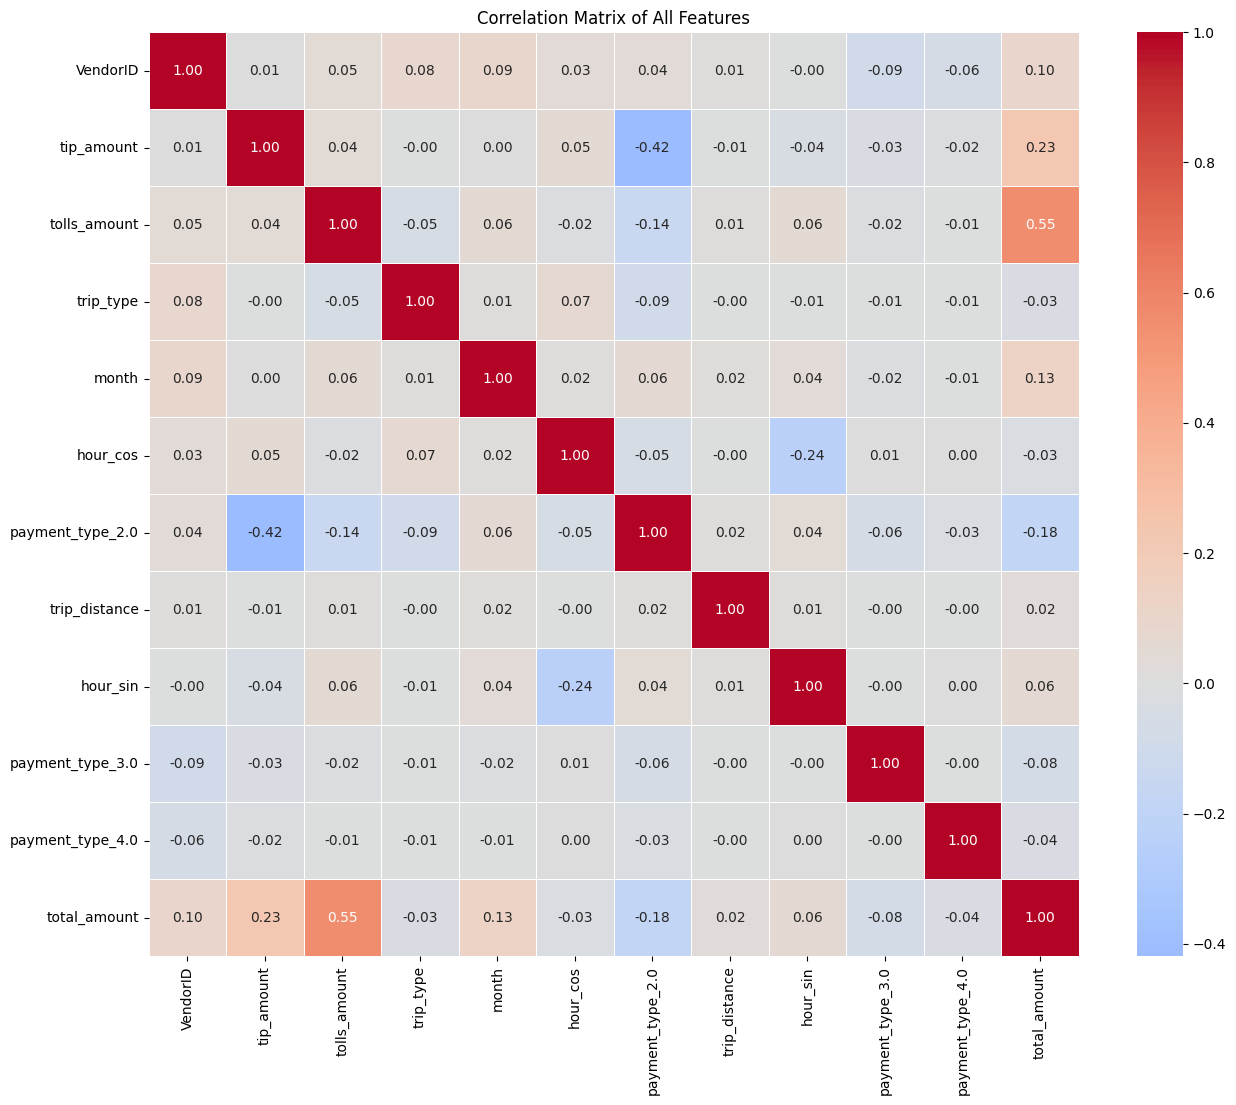

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_model_2.corr()

print("Correlation Matrix (All Features):")
print(correlation_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()


There are no strong correlation's here so we can move on

In [10]:
df_model_2

,VendorID,tip_amount,tolls_amount,trip_type,month,hour_cos,payment_type_2.0,trip_distance,hour_sin,payment_type_3.0,payment_type_4.0,total_amount
0,2.0,0.00,0.0,0,0,1.000000,1,1.01,0.000000,0,0,6.80
1,2.0,2.81,0.0,0,0,1.000000,0,2.53,0.000000,0,0,16.86
2,2.0,1.00,0.0,0,0,1.000000,0,1.12,0.000000,0,0,8.30
3,2.0,0.00,0.0,0,0,1.000000,0,0.00,0.000000,1,0,-52.80
4,2.0,0.00,0.0,0,0,1.000000,1,0.00,0.000000,0,0,52.80
...,...,...,...,...,...,...,...,...,...,...,...,...
819605,2.0,0.00,0.0,0,11,0.965926,1,10.81,-0.258819,0,0,49.20
819606,2.0,3.00,0.0,0,11,0.965926,0,4.65,-0.258819,0,0,28.39
819607,2.0,6.00,0.0,0,11,0.965926,0,6.70,-0.258819,0,0,33.23
819608,2.0,8.42,0.0,0,11,0.965926,0,10.38,-0.258819,0,0,46.55


Lets see their distribution's (we may be able to benefit from some sort of transformation)

In [11]:
df_model_2.month.value_counts()

month
9     110891
10    108228
11     99956
8      95707
7      83491
5      54451
6      51157
4      50532
3      45971
2      43297
0      40468
1      35461
Name: count, dtype: int64

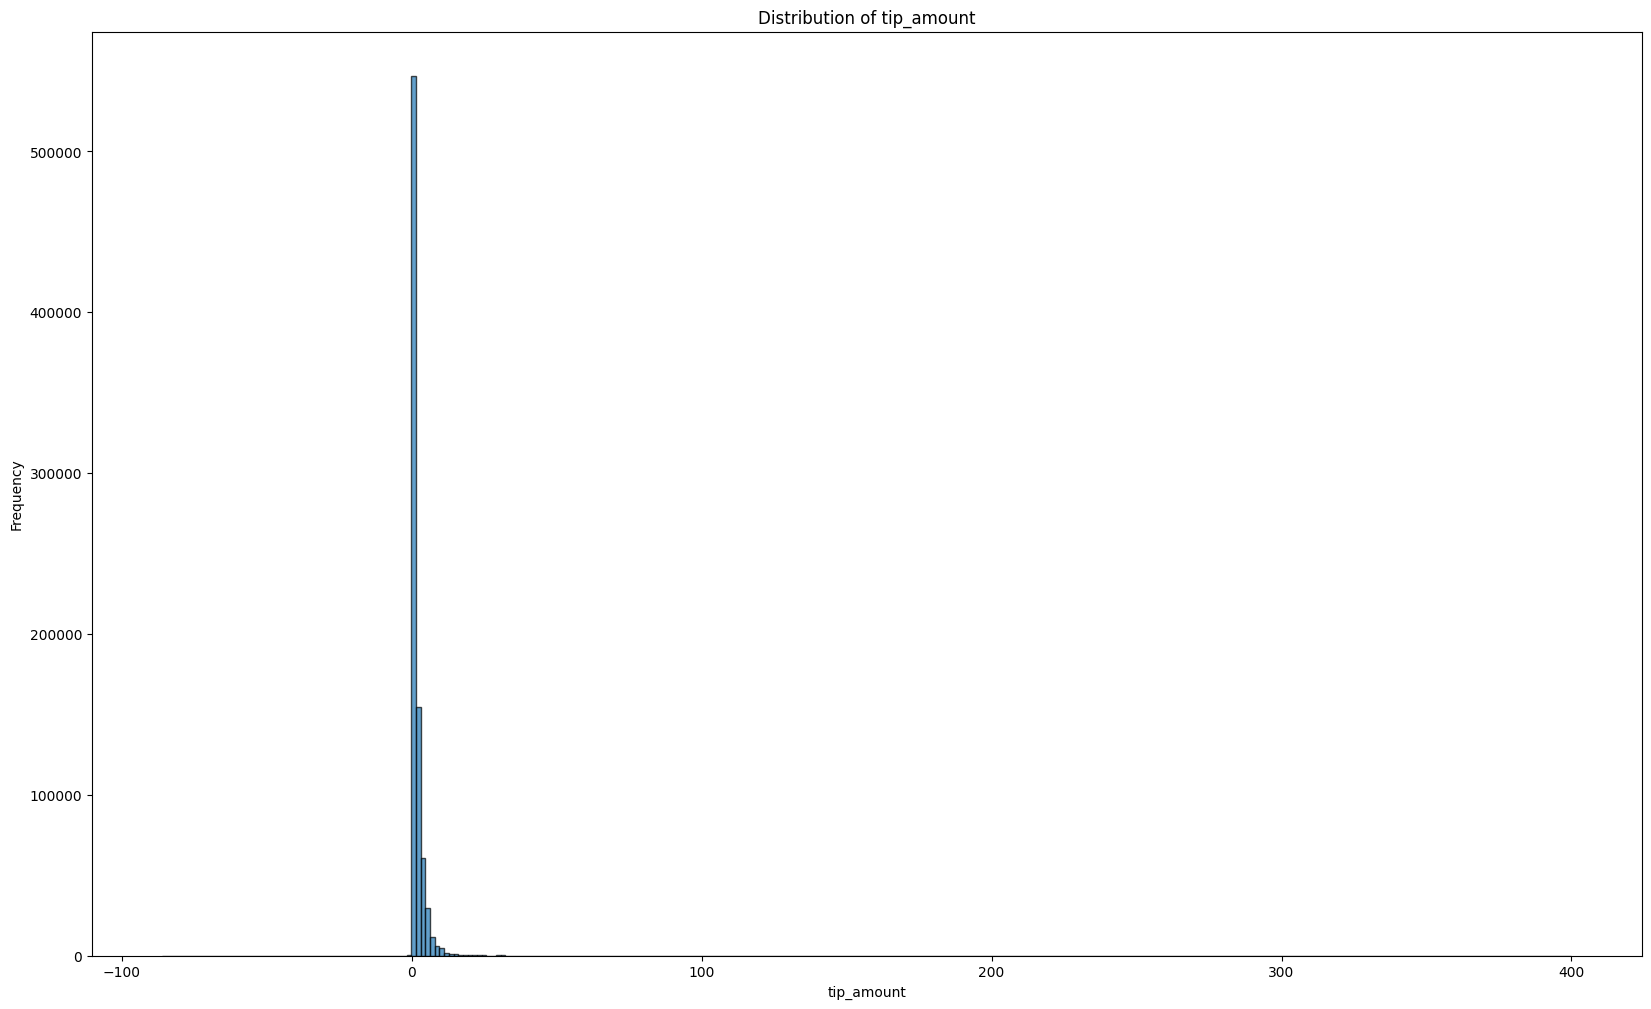

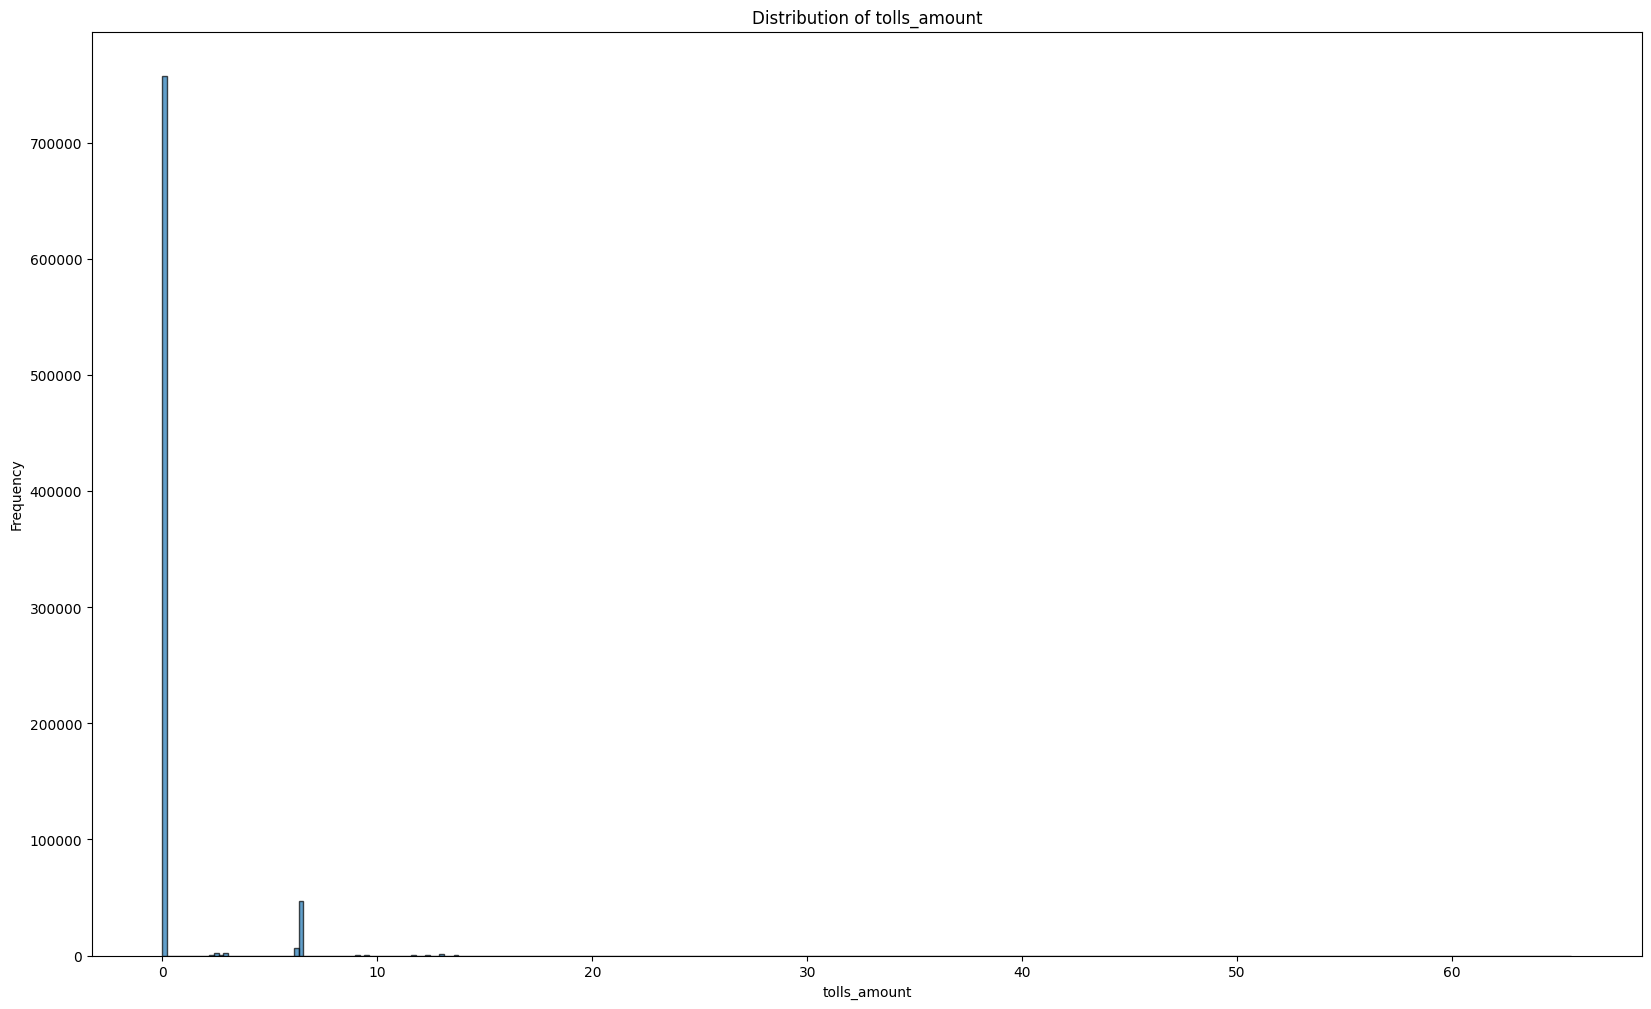

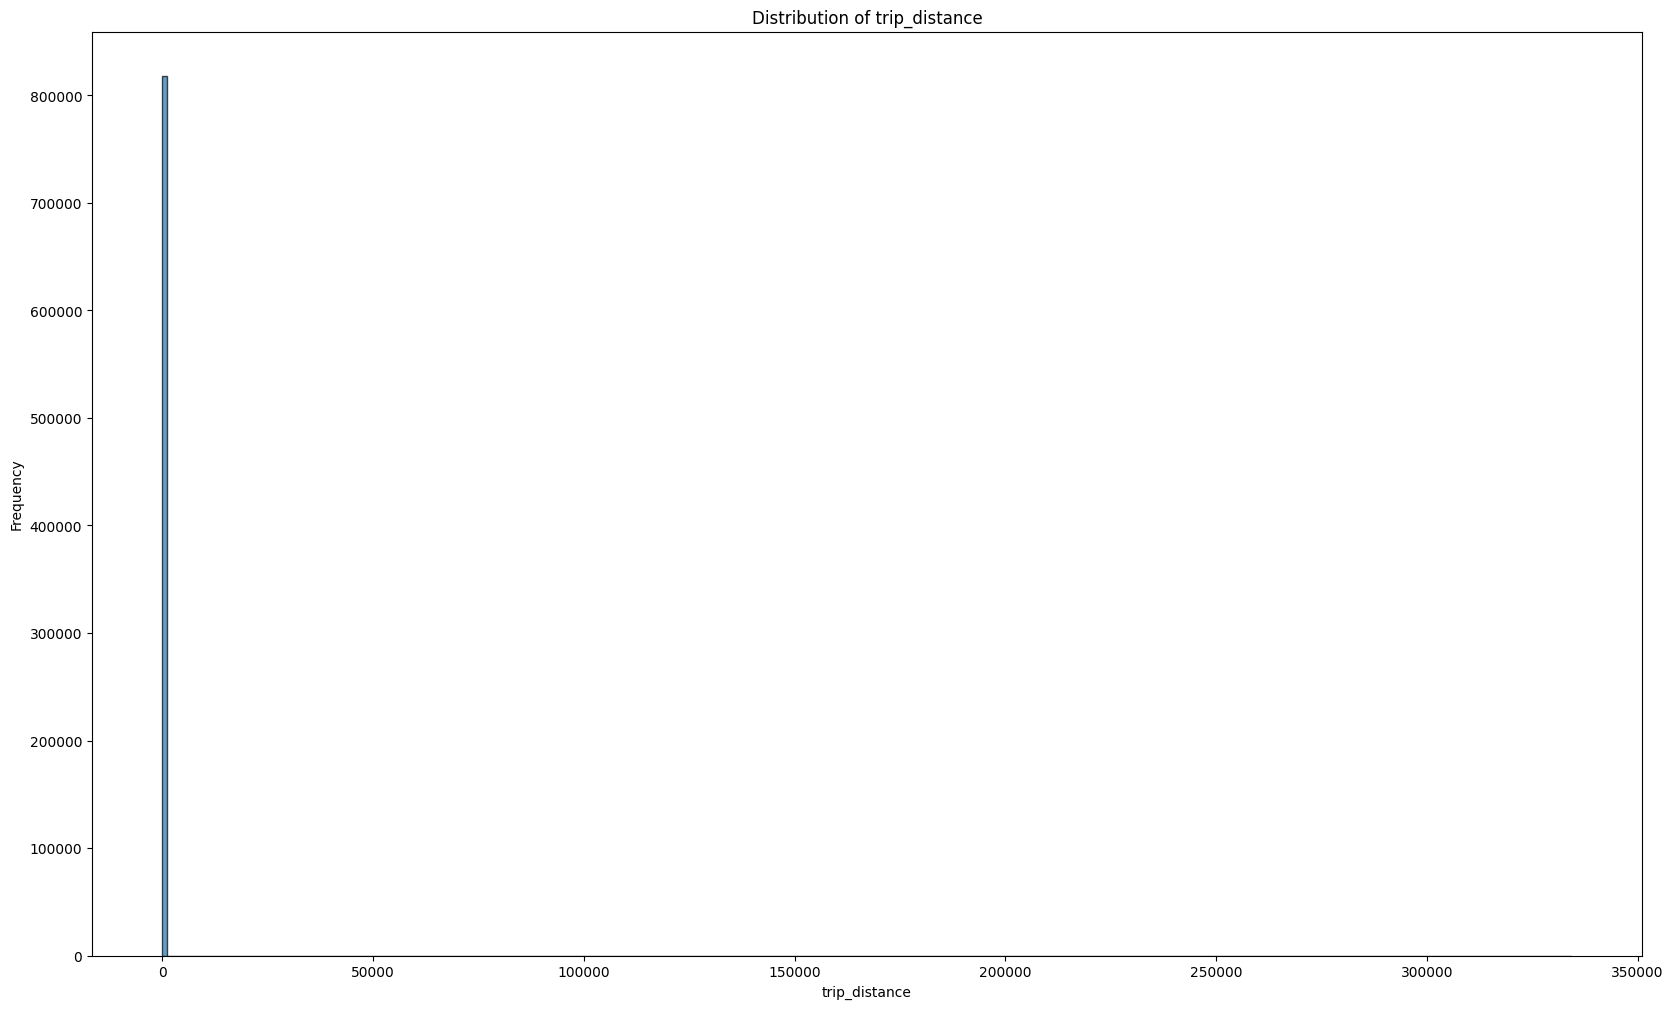

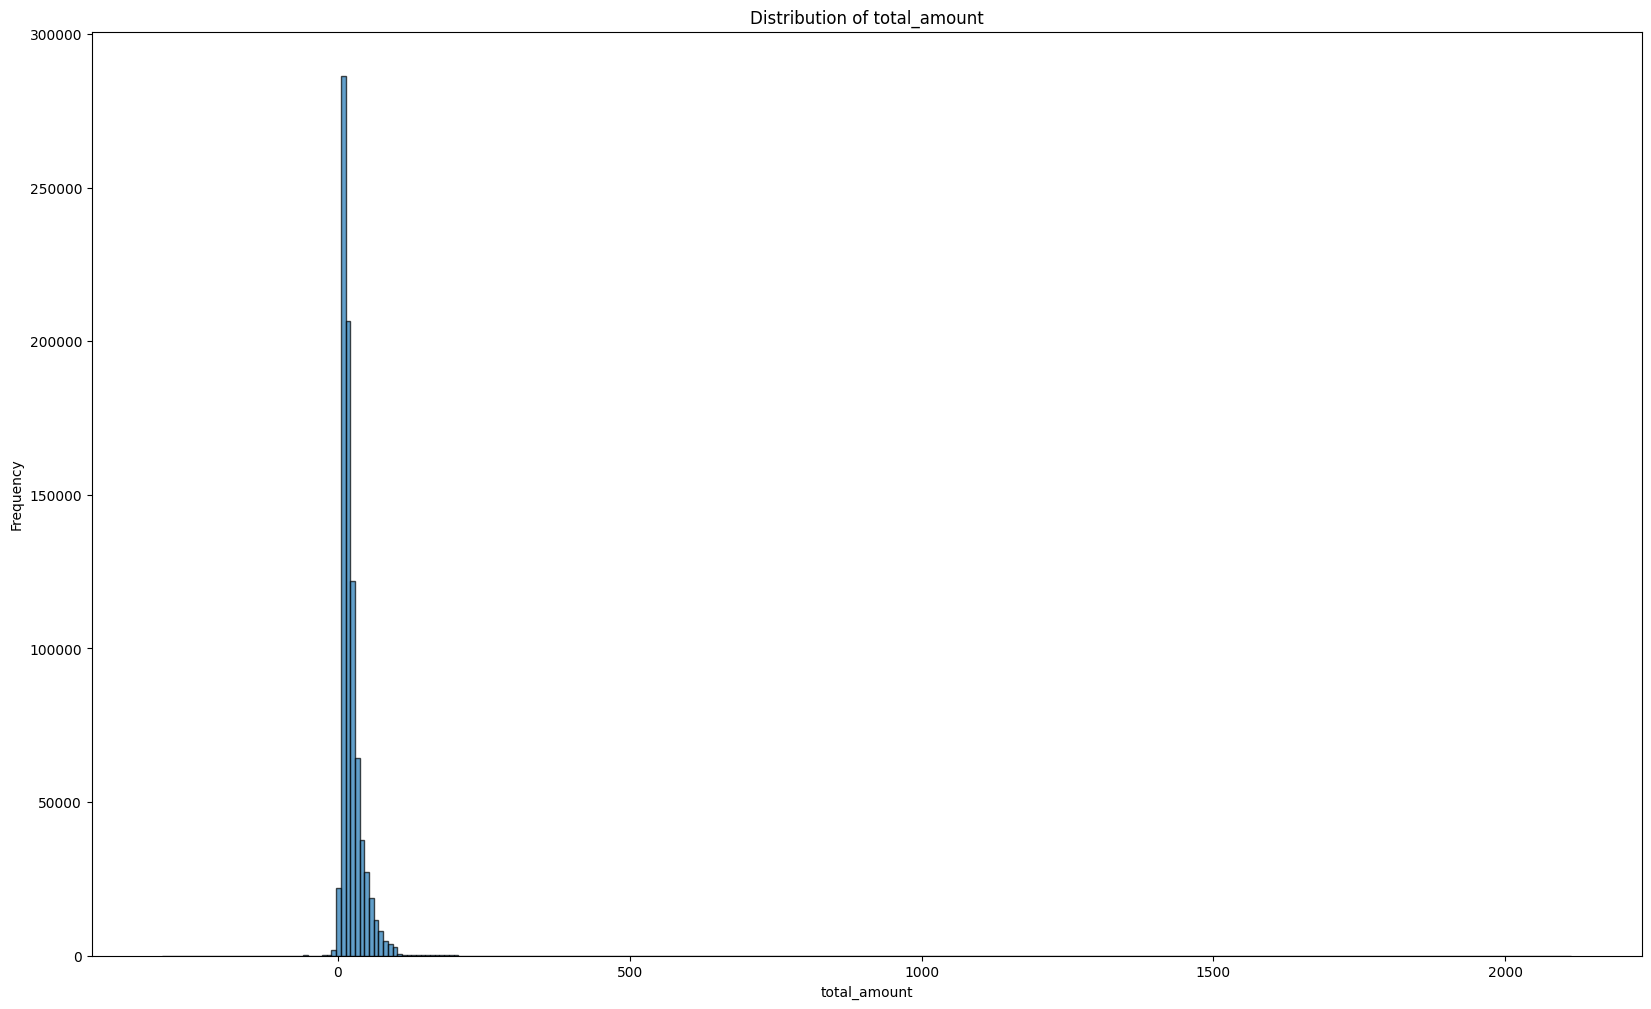

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


temp = [
    'tip_amount', 'tolls_amount', 'trip_distance', 'total_amount'
]

for col in temp:
    plt.figure(figsize=(20, 12))
    plt.hist(df_model_2[col], bins=300, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

I saw something in the total amount column

In [13]:
temp = df_model_2[df_model_2["tip_amount"] < 0]

In [14]:
temp

,VendorID,tip_amount,tolls_amount,trip_type,month,hour_cos,payment_type_2.0,trip_distance,hour_sin,payment_type_3.0,payment_type_4.0,total_amount
3424,2.0,-1.14,0.0,0,0,-0.707107,0,0.0,-7.071068e-01,1,0,-4.94
4098,2.0,-0.76,0.0,0,0,-0.500000,0,0.0,-8.660254e-01,1,0,-4.56
6465,2.0,-1.29,0.0,0,0,-0.500000,0,0.0,-8.660254e-01,1,0,-5.59
10357,2.0,-0.86,0.0,0,0,-0.965926,0,0.0,2.588190e-01,1,0,-5.16
10359,2.0,-0.66,0.0,0,0,-0.965926,0,0.0,2.588190e-01,1,0,-3.96
...,...,...,...,...,...,...,...,...,...,...,...,...
773657,2.0,-0.66,0.0,0,11,-1.000000,0,0.0,1.224647e-16,1,0,-3.96
773984,2.0,-0.01,0.0,0,11,-0.707107,0,0.0,-7.071068e-01,1,0,-3.81
778174,2.0,-0.66,0.0,0,11,-0.965926,0,0.0,2.588190e-01,1,0,-3.96
778759,2.0,-0.66,0.0,0,11,-0.866025,0,0.0,-5.000000e-01,1,0,-3.96


these are most likely wrong so lets remove them

In [15]:
df_model_2 = df_model_2[df_model_2["tip_amount"] >= 0]

In [16]:
df_model_2.head()

,VendorID,tip_amount,tolls_amount,trip_type,month,hour_cos,payment_type_2.0,trip_distance,hour_sin,payment_type_3.0,payment_type_4.0,total_amount
0,2.0,0.00,0.0,0,0,1.0,1,1.01,0.0,0,0,6.80
1,2.0,2.81,0.0,0,0,1.0,0,2.53,0.0,0,0,16.86
2,2.0,1.00,0.0,0,0,1.0,0,1.12,0.0,0,0,8.30
3,2.0,0.00,0.0,0,0,1.0,0,0.00,0.0,1,0,-52.80
4,2.0,0.00,0.0,0,0,1.0,1,0.00,0.0,0,0,52.80


In [17]:
(len(df_model_2[df_model_2["total_amount"] < 0]) / len(df_model_2)) * 100

0.2262669852792213

Less than a quarter of a percent, safe to say we can easily drop them.

In [18]:
df_model_2 = df_model_2[df_model_2["total_amount"] >= 0]

lets see the distribution of the target column.

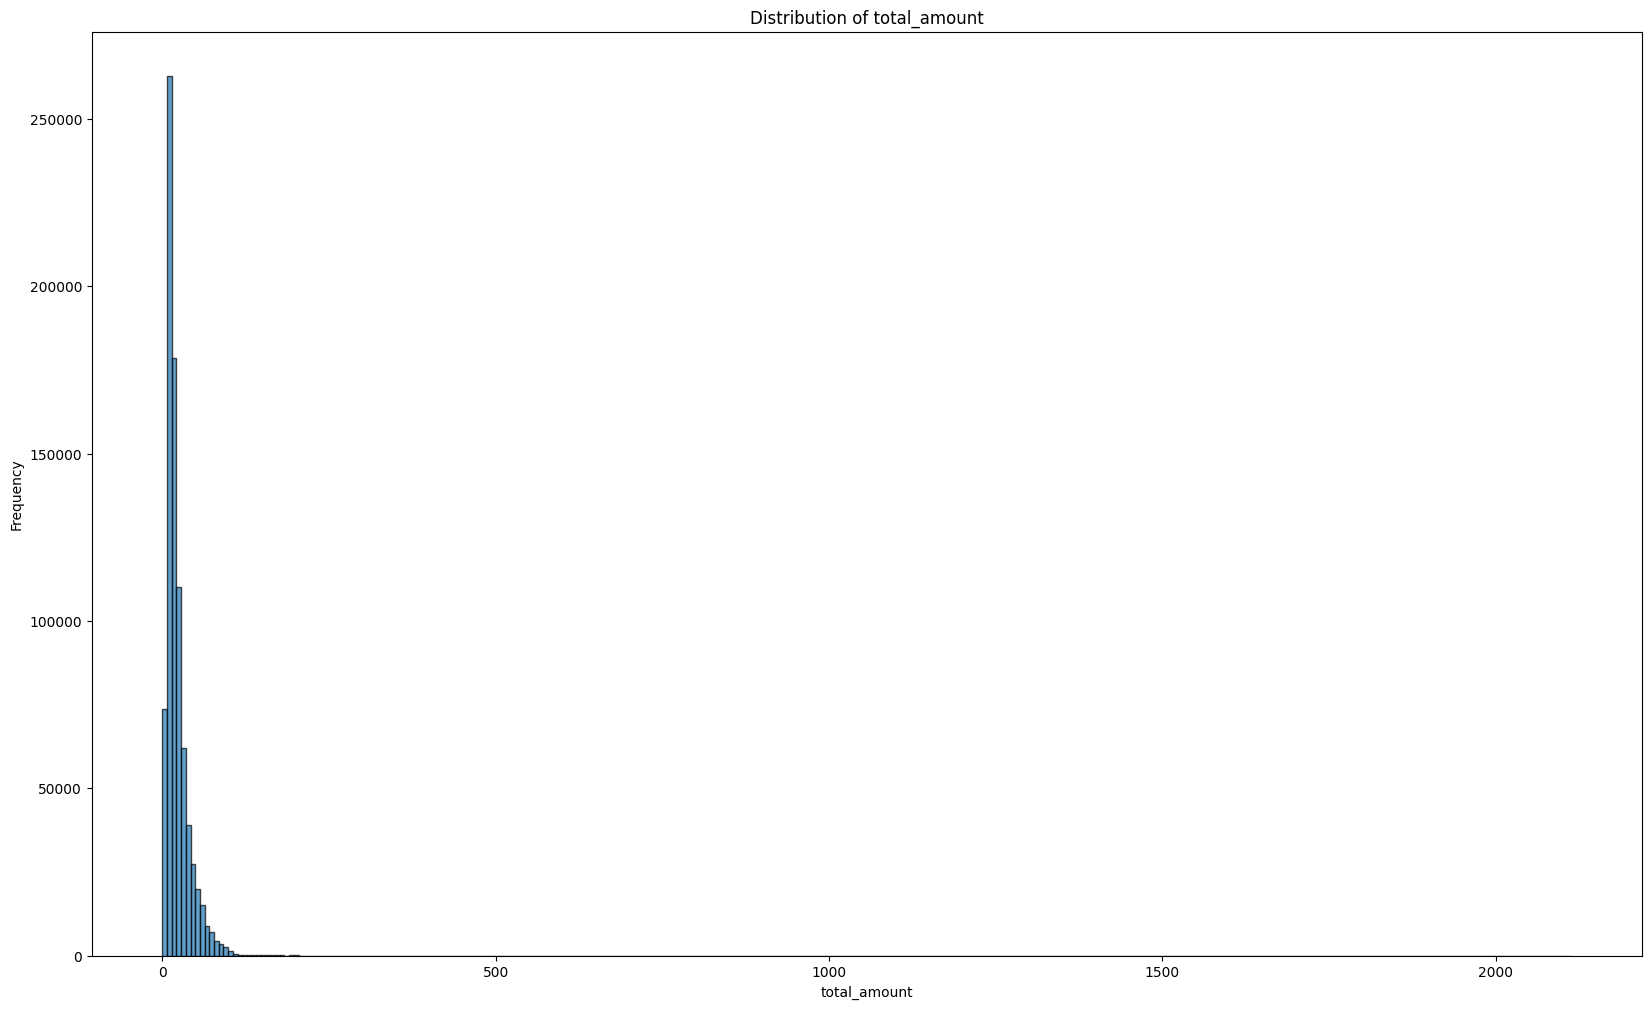

In [19]:
plt.figure(figsize=(20, 12))
plt.hist(df_model_2["total_amount"], bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

Ok not bad.

In [20]:
df_model_2["total_amount"].value_counts()

total_amount
8.30      14985
7.80      14517
7.30      13955
8.80      13620
6.80      13338
          ...  
164.05        1
218.76        1
244.35        1
54.41         1
62.03         1
Name: count, Length: 8851, dtype: int64

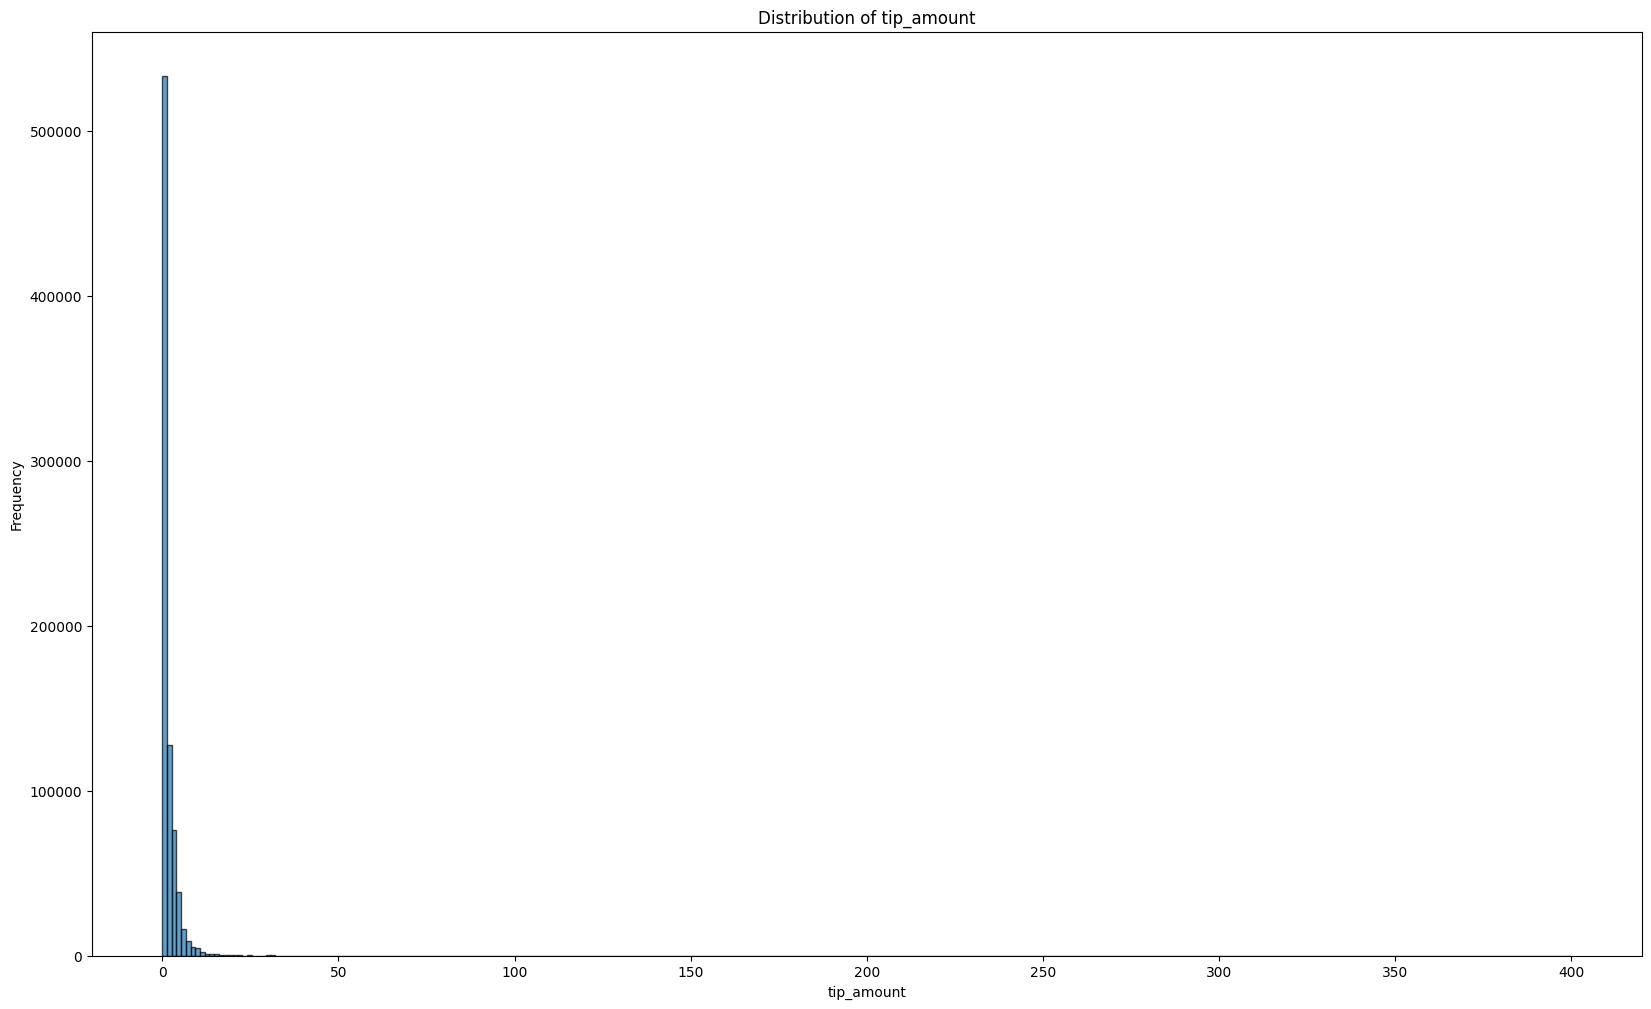

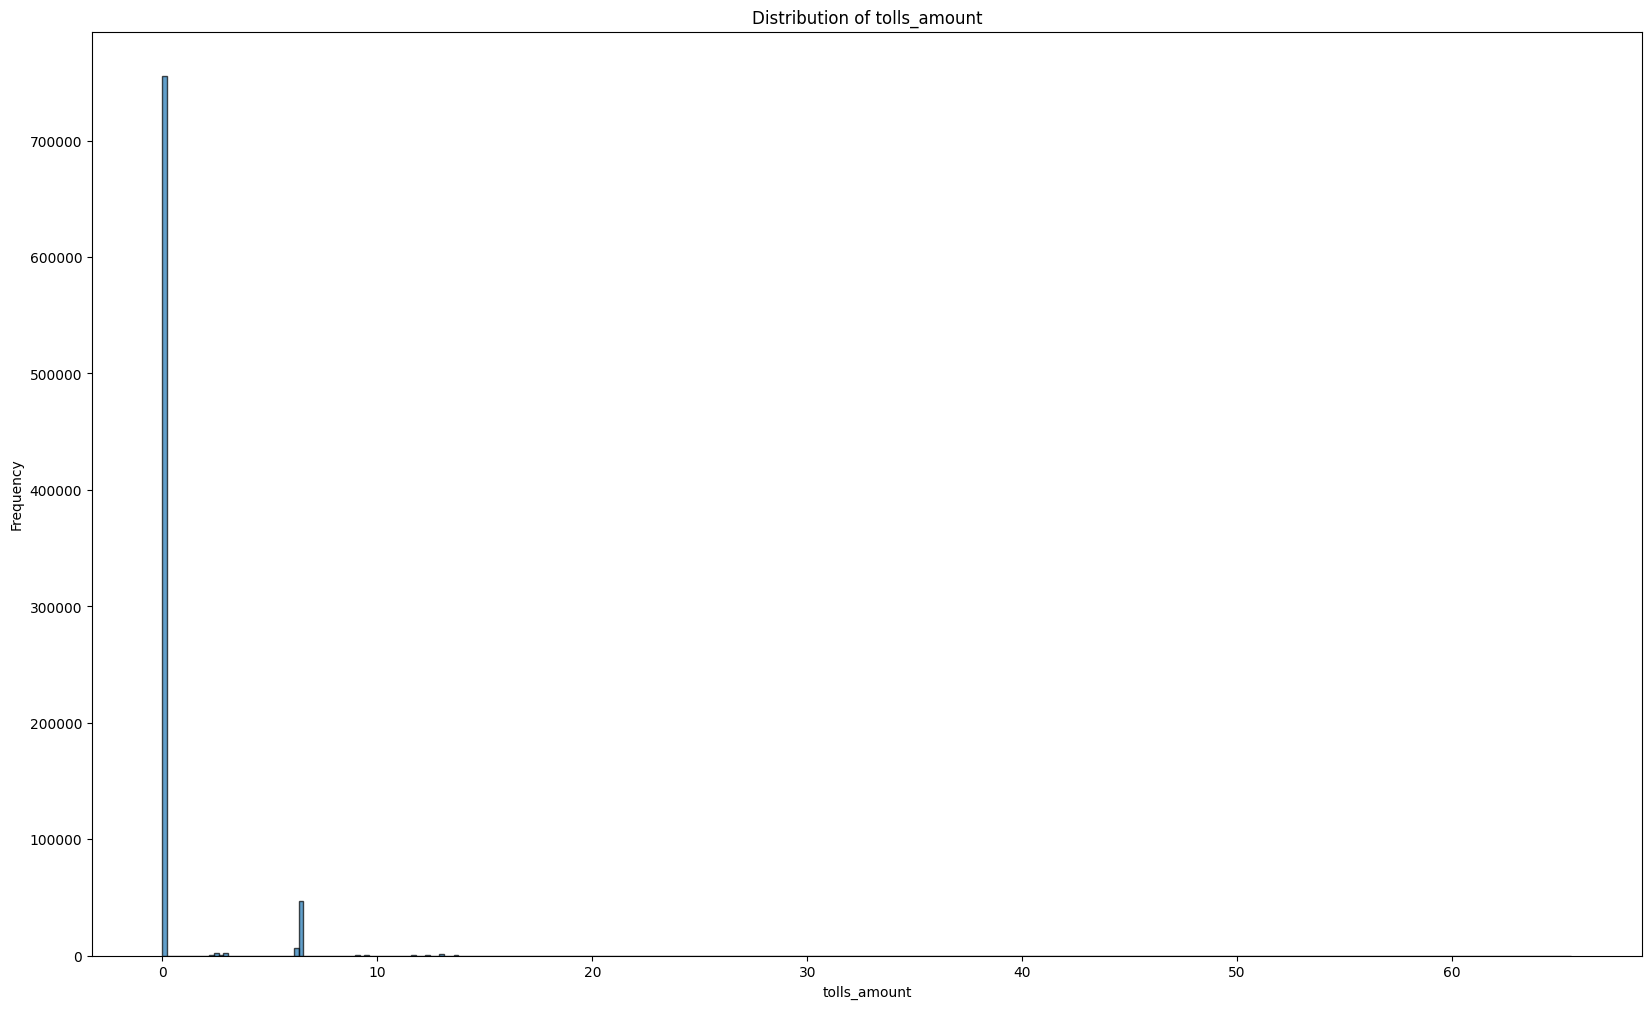

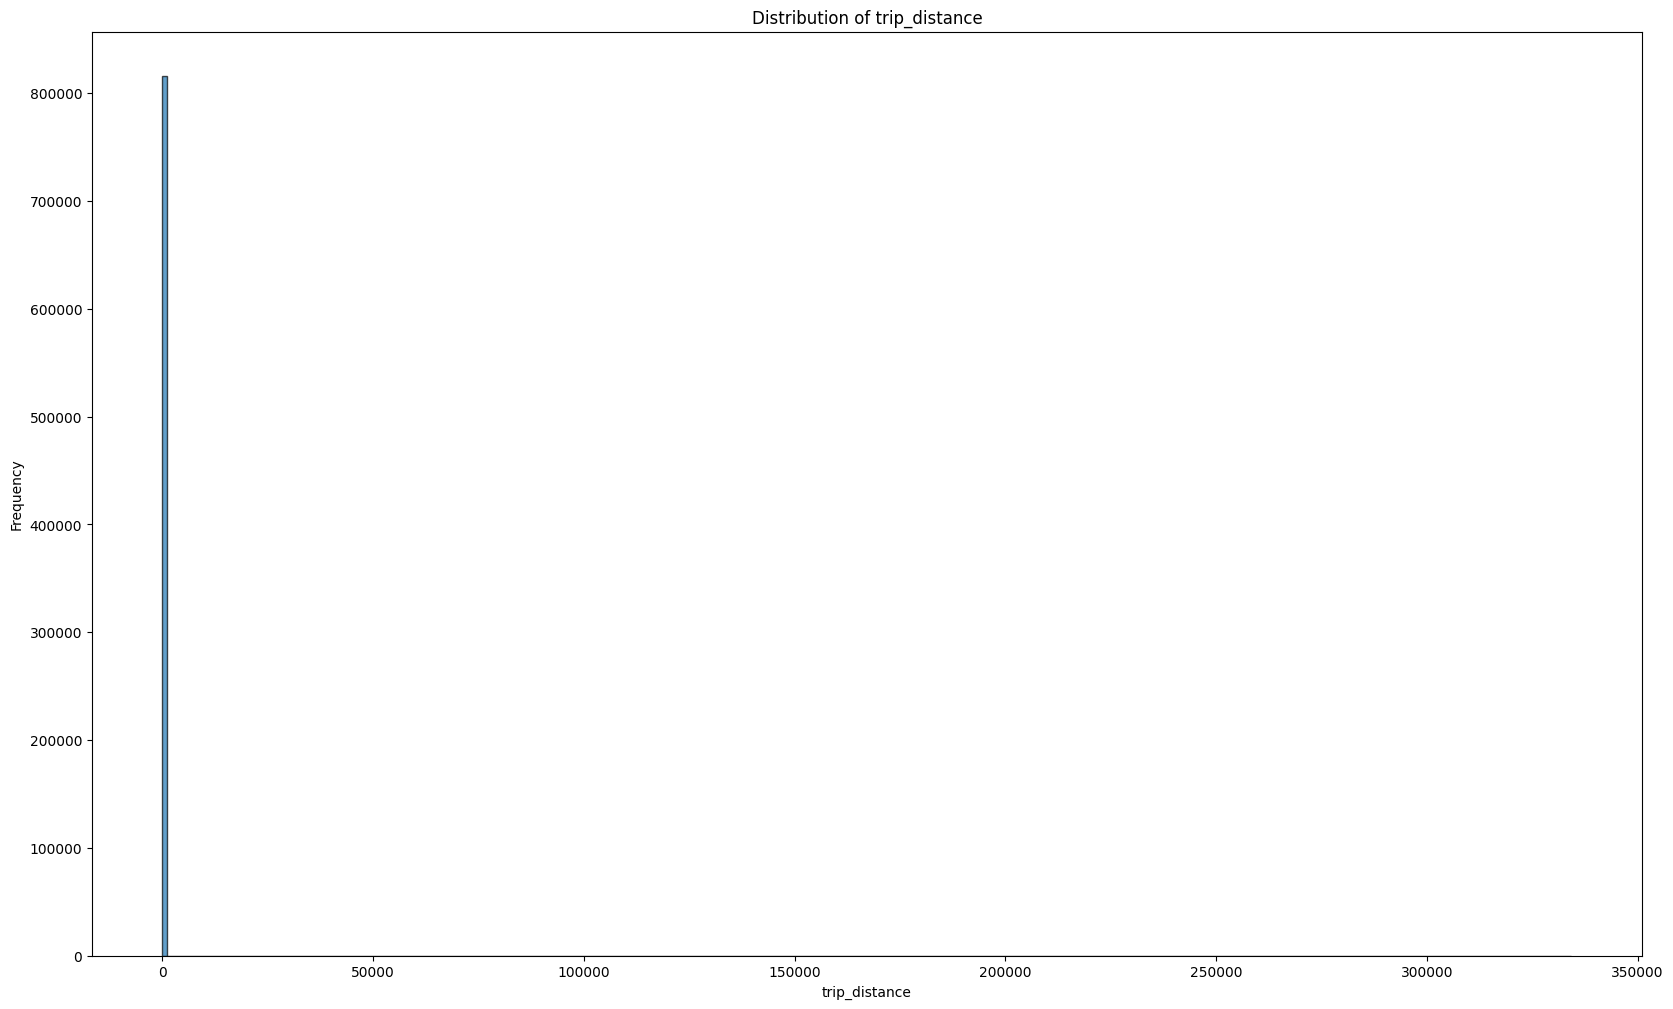

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


temp = [
    'tip_amount', 'tolls_amount', 'trip_distance'
]

for col in temp:
    plt.figure(figsize=(20, 12))
    plt.hist(df_model_2[col], bins=300, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

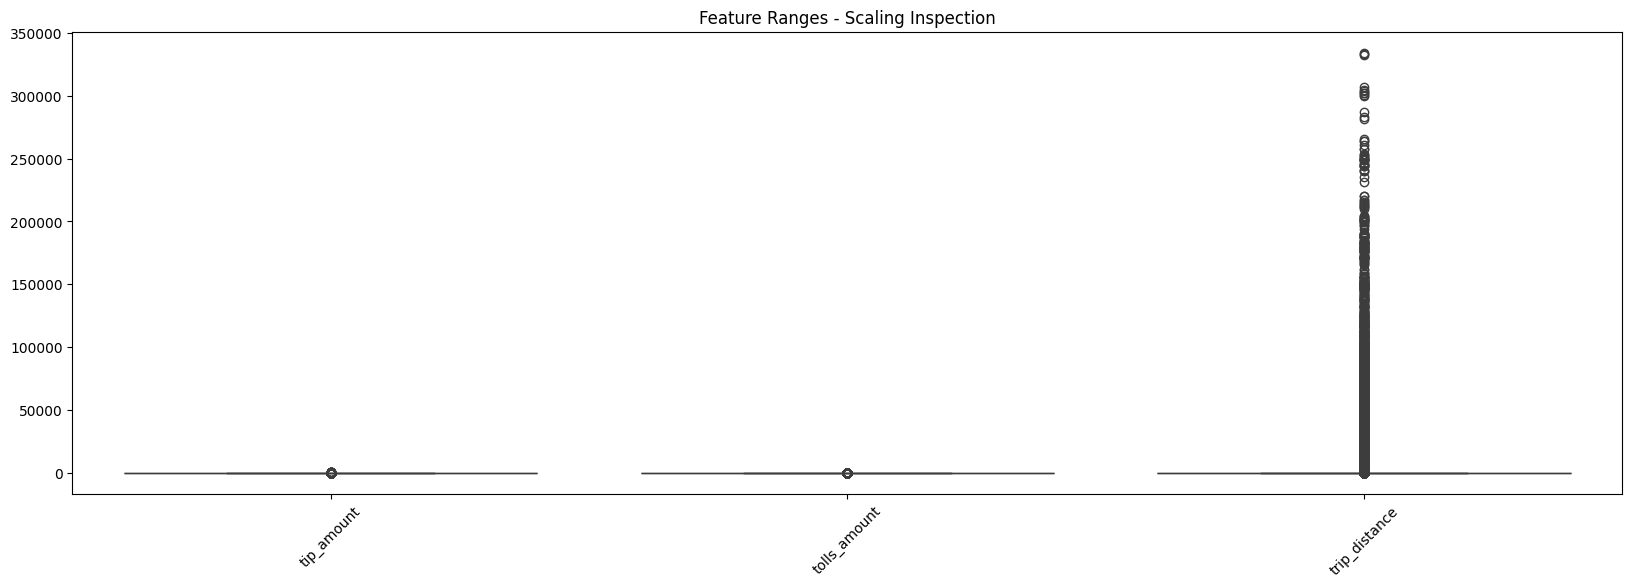

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["tip_amount", "tolls_amount", "trip_distance"]

plt.figure(figsize=(20, 6))
sns.boxplot(data=df_model_2[columns])
plt.xticks(rotation=45)
plt.title("Feature Ranges - Scaling Inspection")
plt.show()

Hmmmm, whats up with trip_distance ?

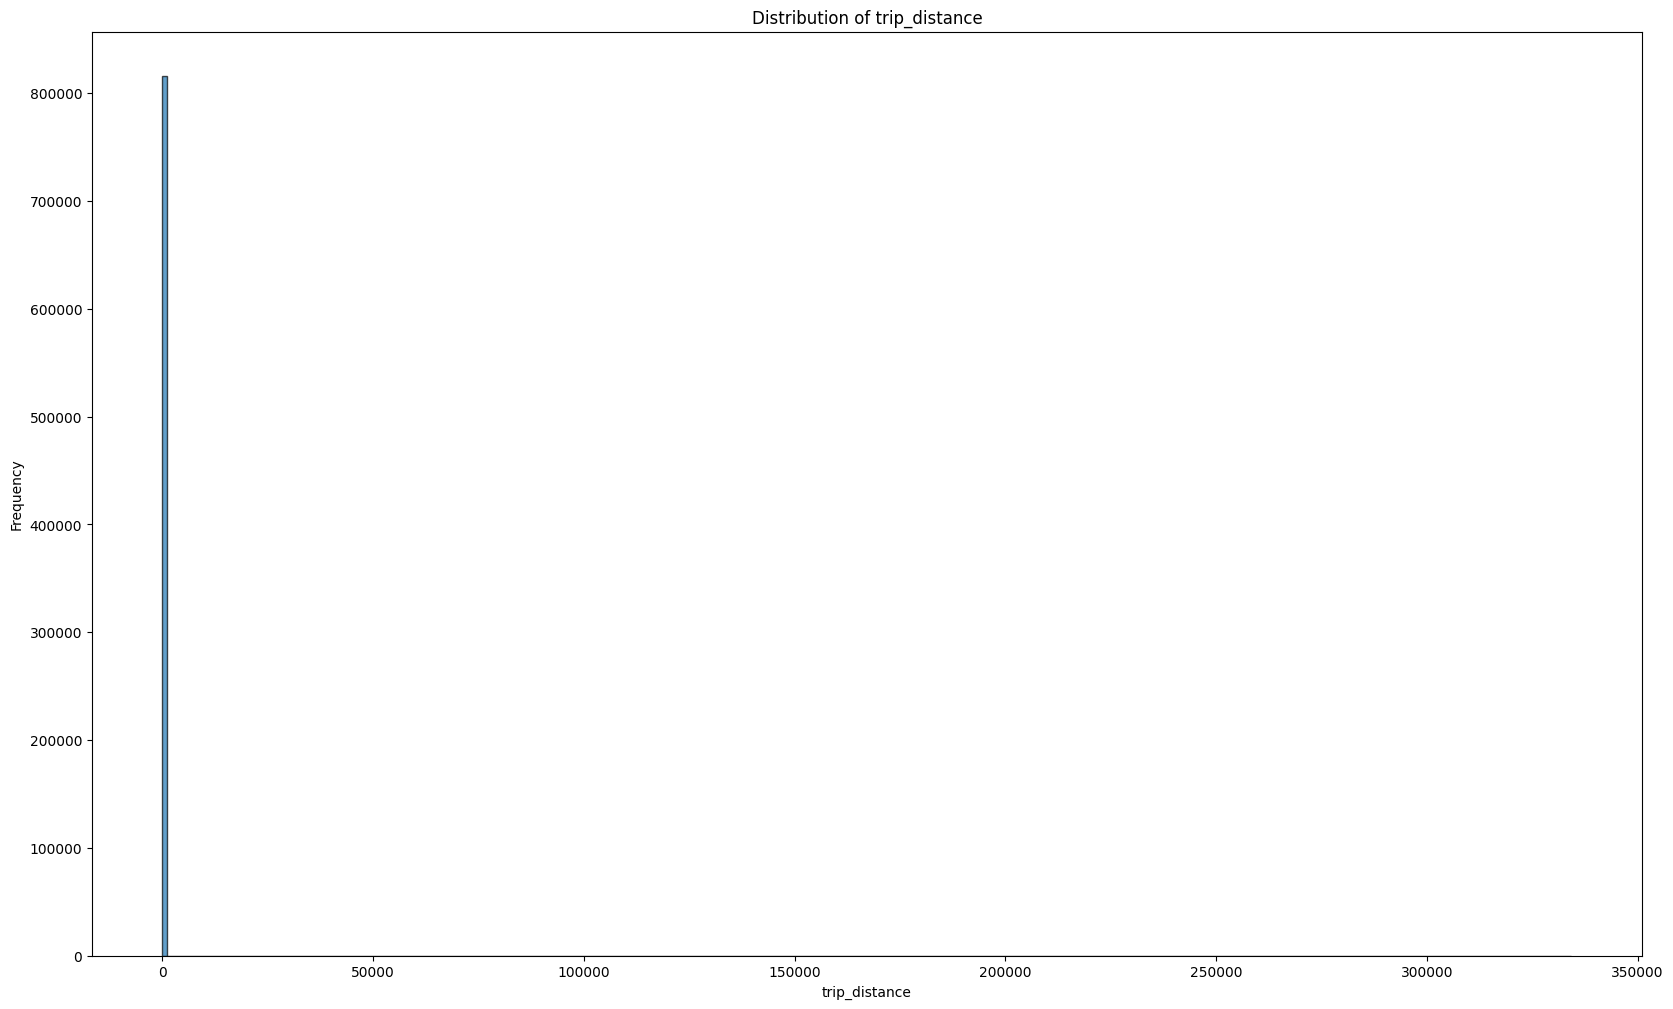

In [23]:
plt.figure(figsize=(20, 12))
plt.hist(df_model_2["trip_distance"], bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

In [24]:
len(df_model_2[df_model_2["trip_distance"] == 0]) / len(df_model_2) * 100

4.409001727149518

In [25]:
df_model_2 = df_model_2[df_model_2["trip_distance"] != 0]

In [26]:
import numpy as np

df_model_2['trip_distance'] = df_model_2['trip_distance'].apply(lambda x: np.log(x) if x > 0 else 0)

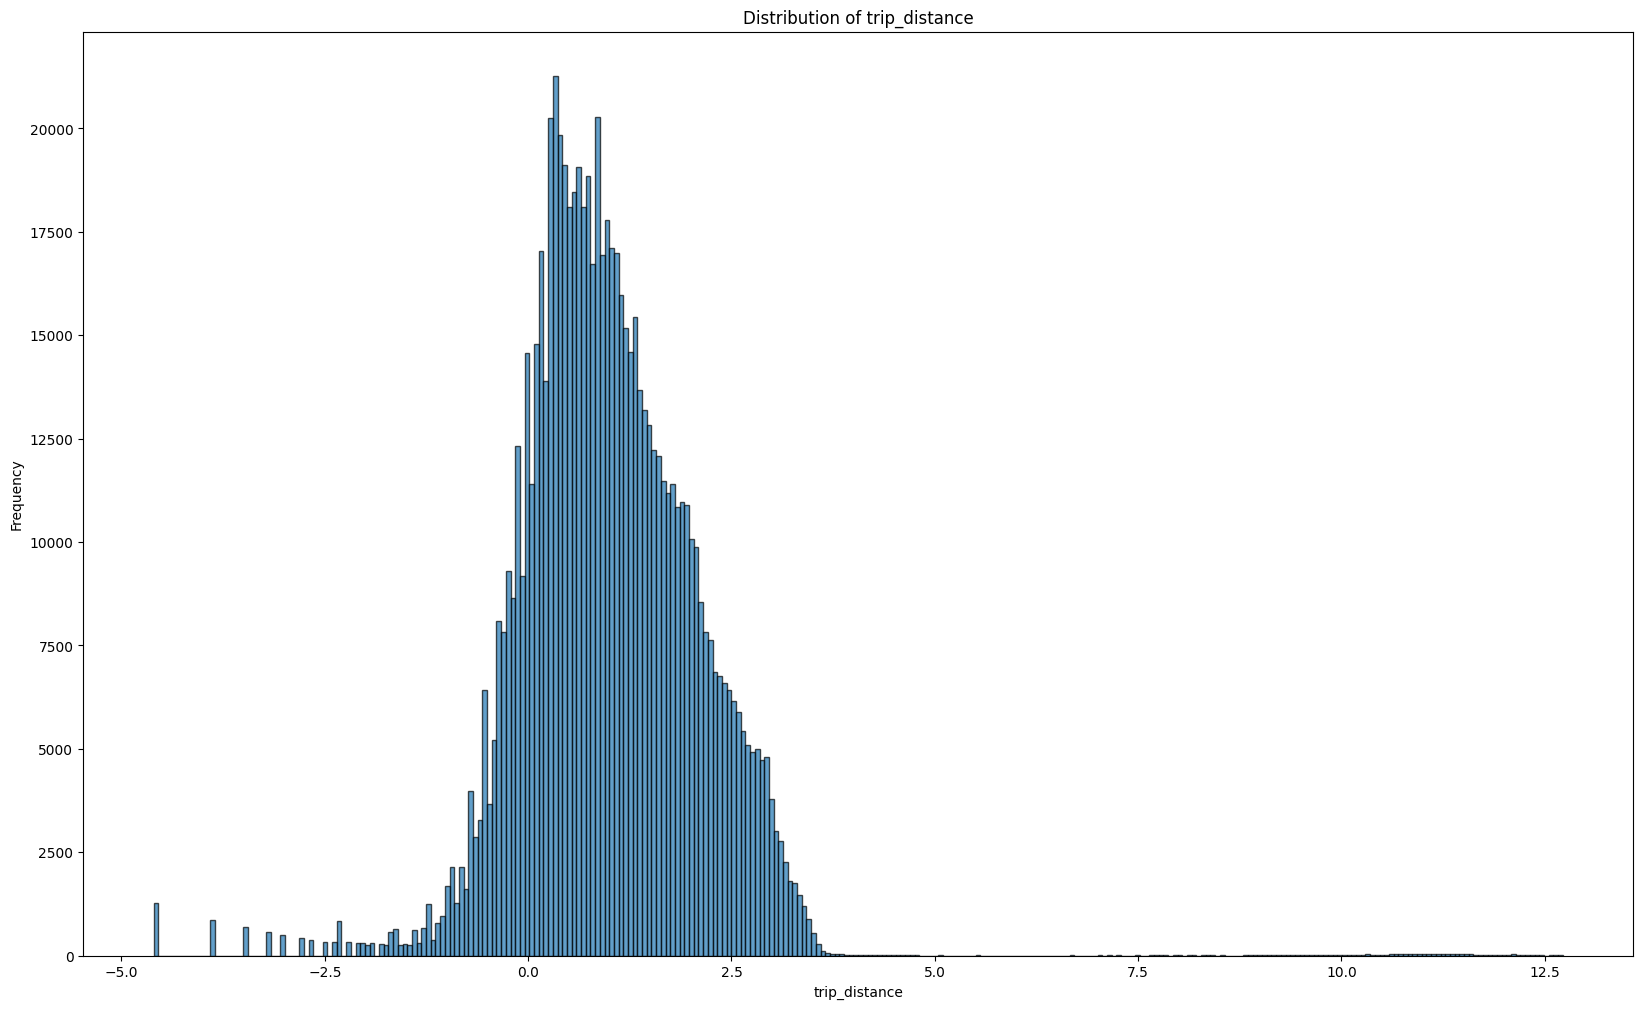

In [27]:
plt.figure(figsize=(20, 12))
plt.hist(df_model_2["trip_distance"], bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

Better

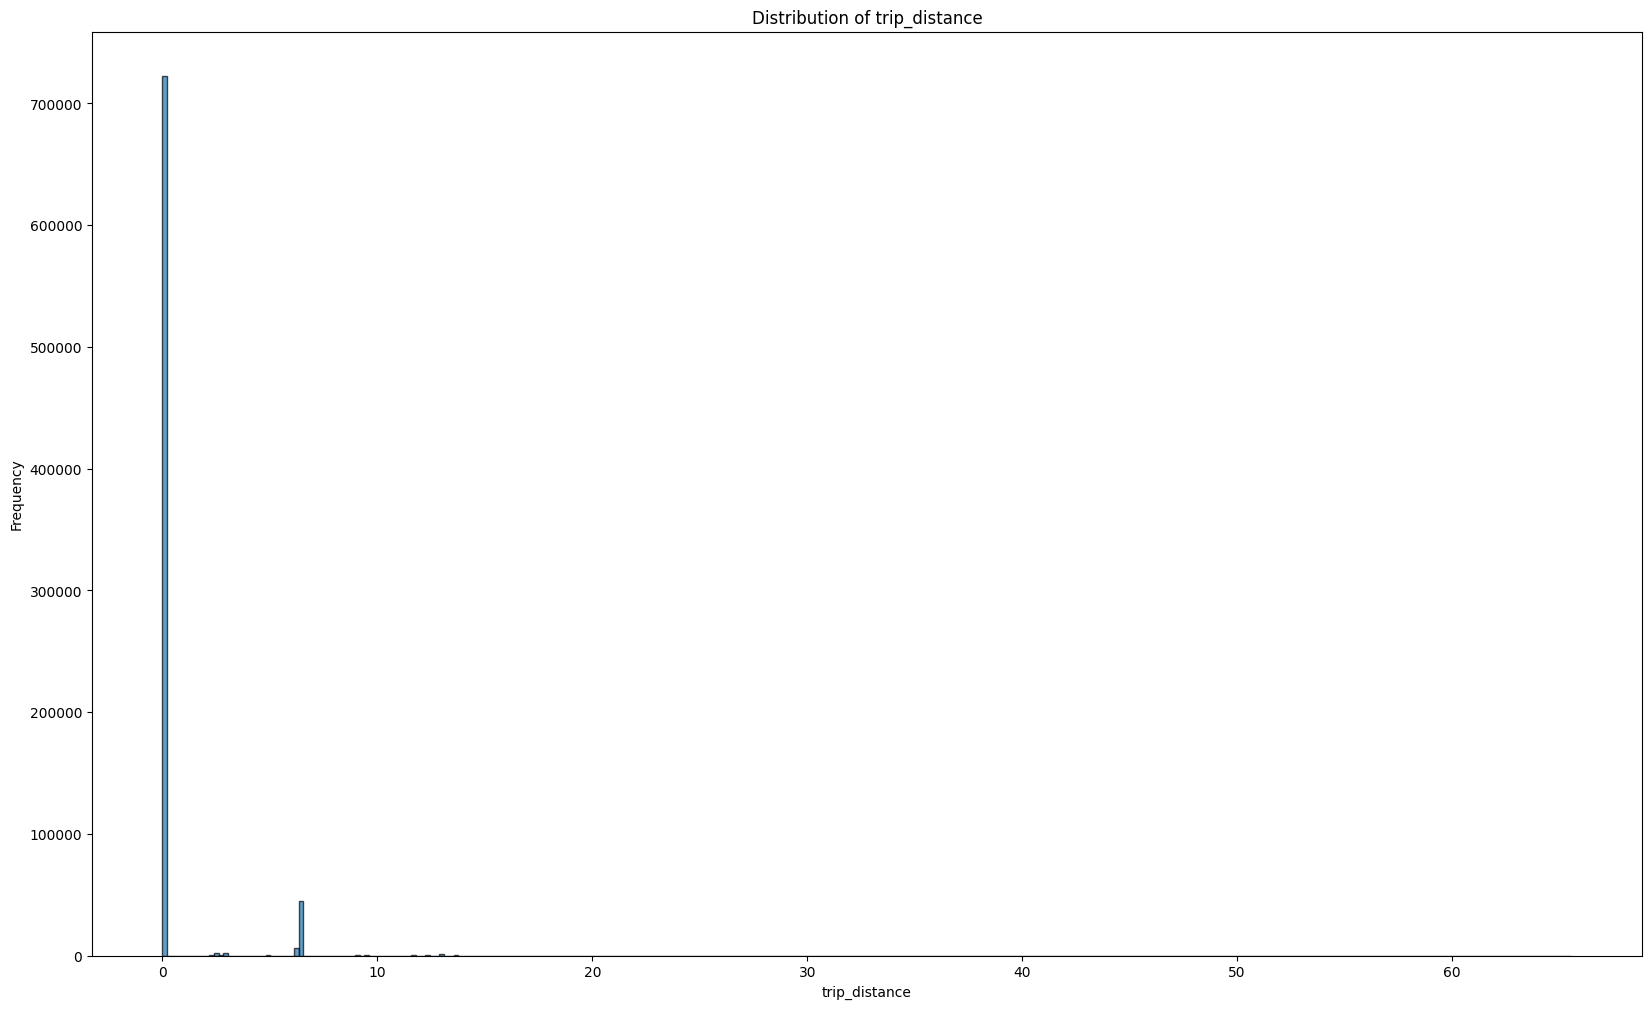

In [28]:
plt.figure(figsize=(20, 12))
plt.hist(df_model_2["tolls_amount"], bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

In [29]:
len(df_model_2)

781487

In [30]:
df_model_2.tolls_amount.value_counts()

tolls_amount
0.00     722771
6.55      44609
6.12       6199
3.00       2079
2.45       1993
          ...  
32.50         1
28.50         1
26.50         1
48.35         1
14.85         1
Name: count, Length: 116, dtype: int64

As we can see the tolls amount is mostly 0 (logical seeing as how the trips are inside a city), so we can make it a one hot representation.

In [31]:
df_model_2['tolls_amount'] = (df_model_2['tolls_amount'] > 0).astype(int)

In [32]:
df_model_2

,VendorID,tip_amount,tolls_amount,trip_type,month,hour_cos,payment_type_2.0,trip_distance,hour_sin,payment_type_3.0,payment_type_4.0,total_amount
0,2.0,0.00,0,0,0,1.000000,1,0.009950,0.000000,0,0,6.80
1,2.0,2.81,0,0,0,1.000000,0,0.928219,0.000000,0,0,16.86
2,2.0,1.00,0,0,0,1.000000,0,0.113329,0.000000,0,0,8.30
6,2.0,0.96,0,2,0,1.000000,0,-0.798508,0.000000,0,0,5.76
8,2.0,2.75,0,0,0,1.000000,0,2.500616,0.000000,0,0,42.05
...,...,...,...,...,...,...,...,...,...,...,...,...
819605,2.0,0.00,0,0,11,0.965926,1,2.380472,-0.258819,0,0,49.20
819606,2.0,3.00,0,0,11,0.965926,0,1.536867,-0.258819,0,0,28.39
819607,2.0,6.00,0,0,11,0.965926,0,1.902108,-0.258819,0,0,33.23
819608,2.0,8.42,0,0,11,0.965926,0,2.339881,-0.258819,0,0,46.55


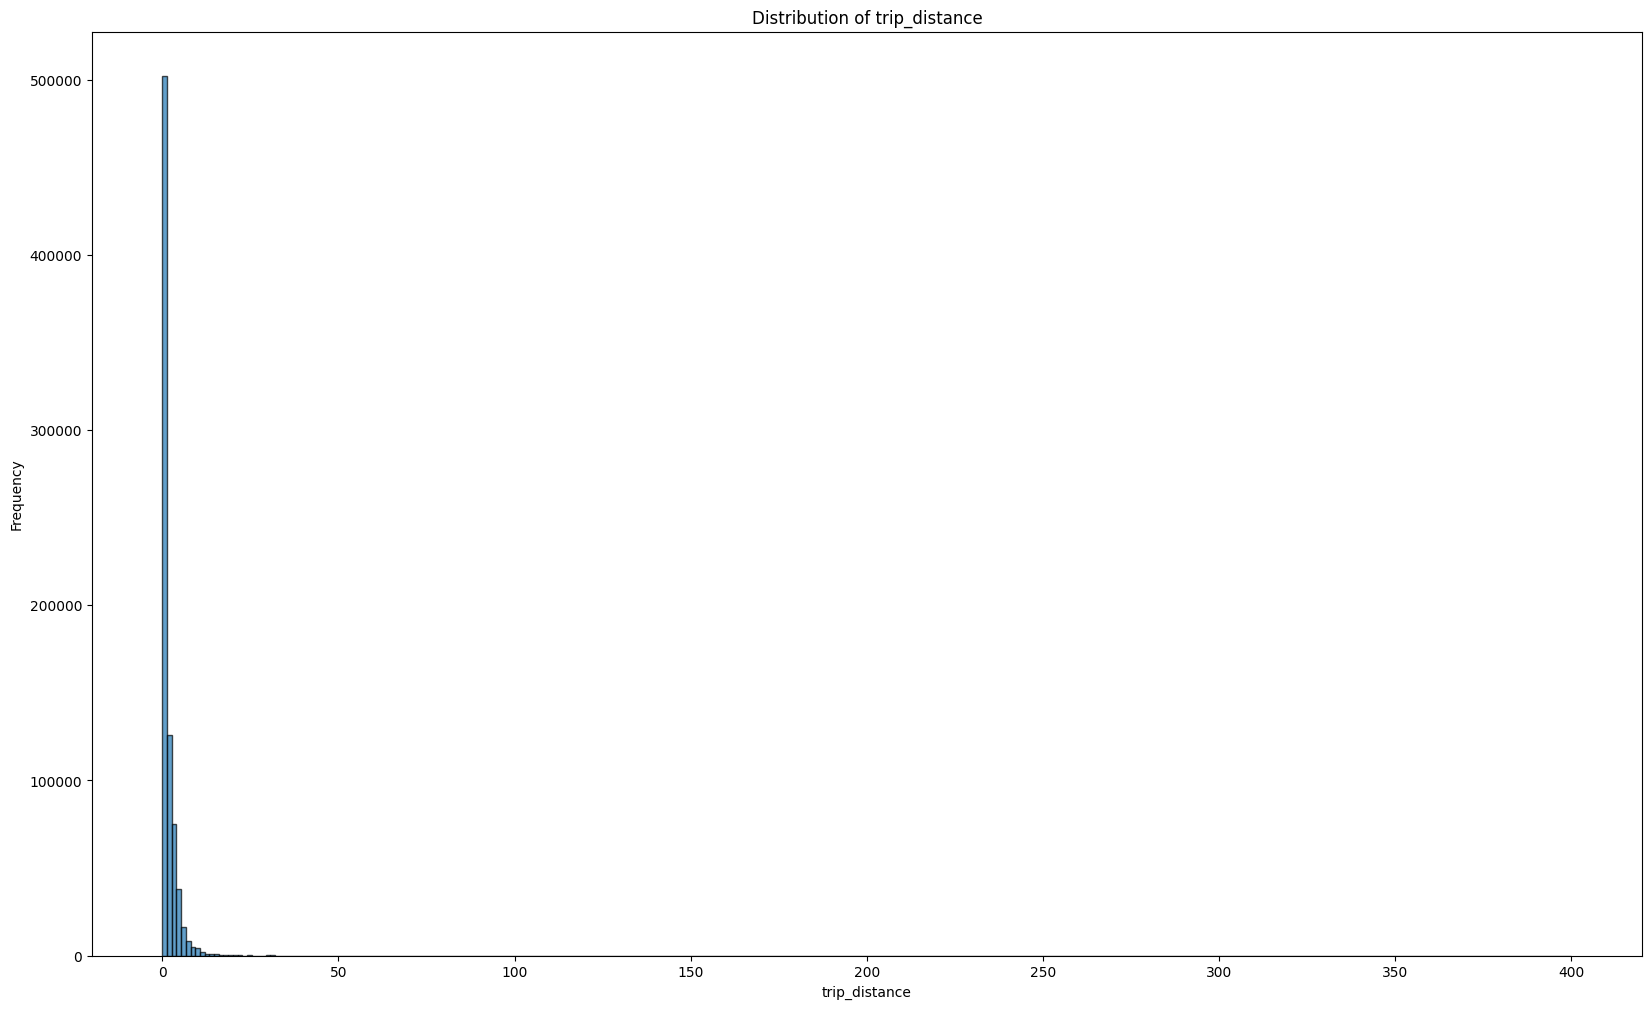

In [33]:
plt.figure(figsize=(20, 12))
plt.hist(df_model_2["tip_amount"], bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

In [34]:
len(df_model_2[df_model_2["tip_amount"] == 0]) / len(df_model_2) * 100

58.847811927773584

We have so much skewness, but because of the percentage of 0's, we cannot really use log tranformation


Lets try some more

In [35]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
temp = transformer.fit_transform(df_model_2[['tip_amount']])

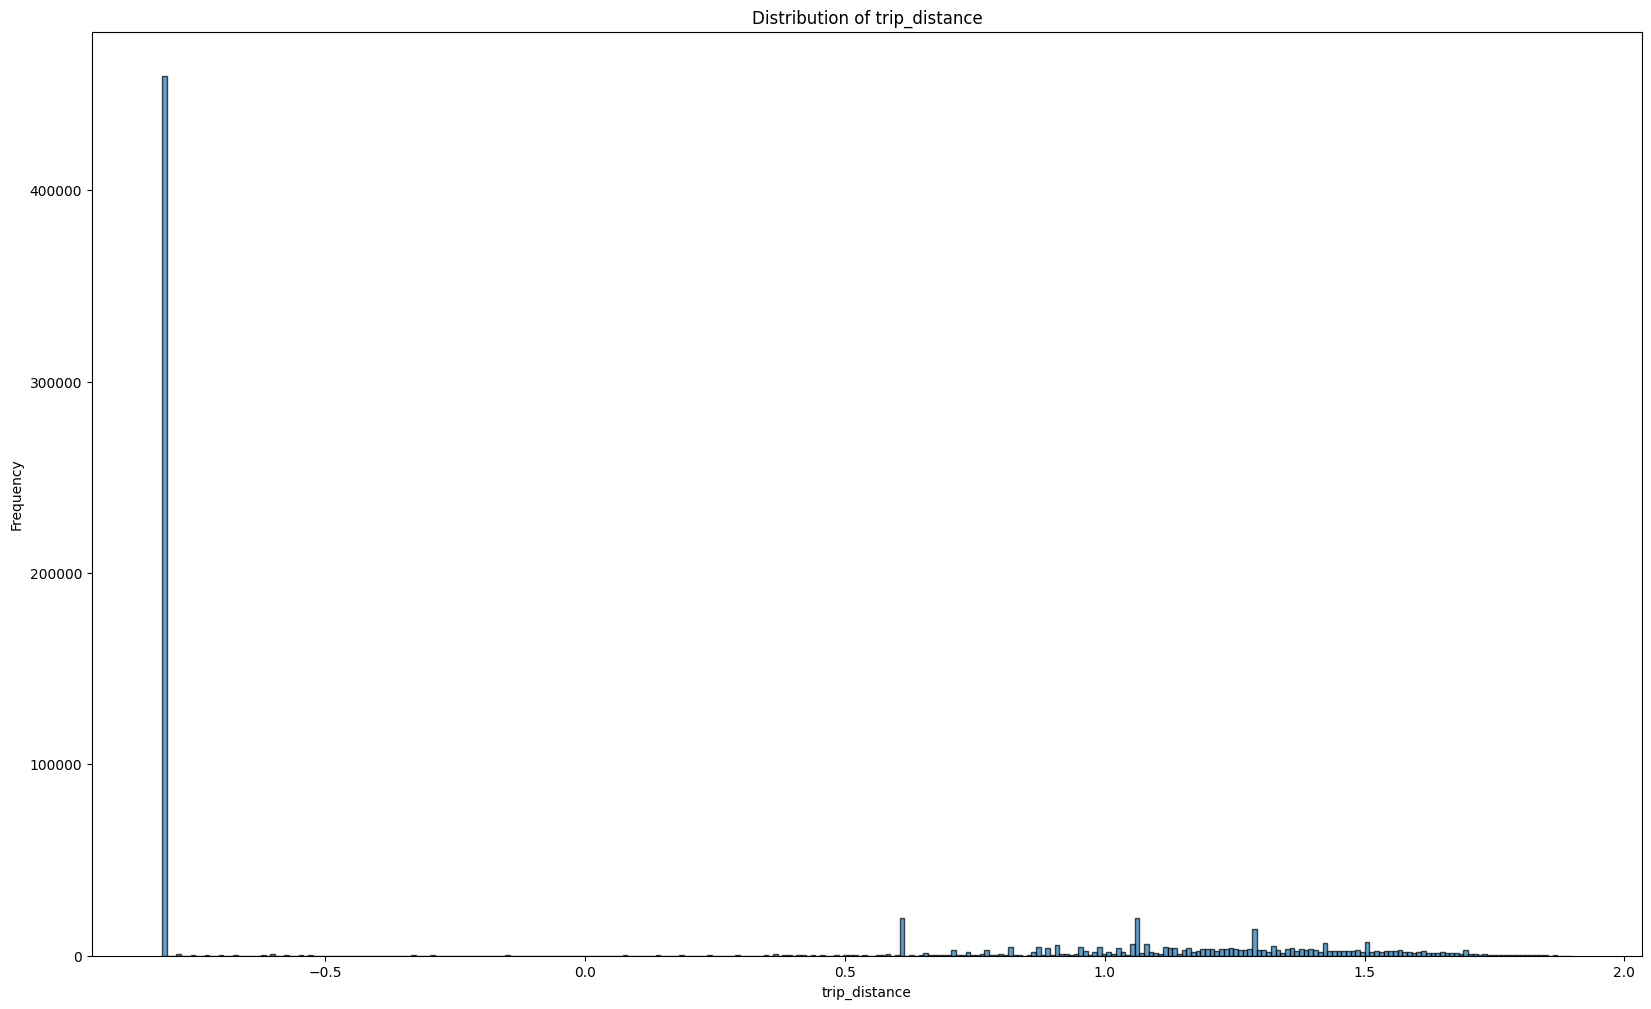

In [36]:
plt.figure(figsize=(20, 12))
plt.hist(temp, bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

In [37]:
import numpy as np

df_model_2['tip_amount'] = np.sqrt(df_model_2['tip_amount'])

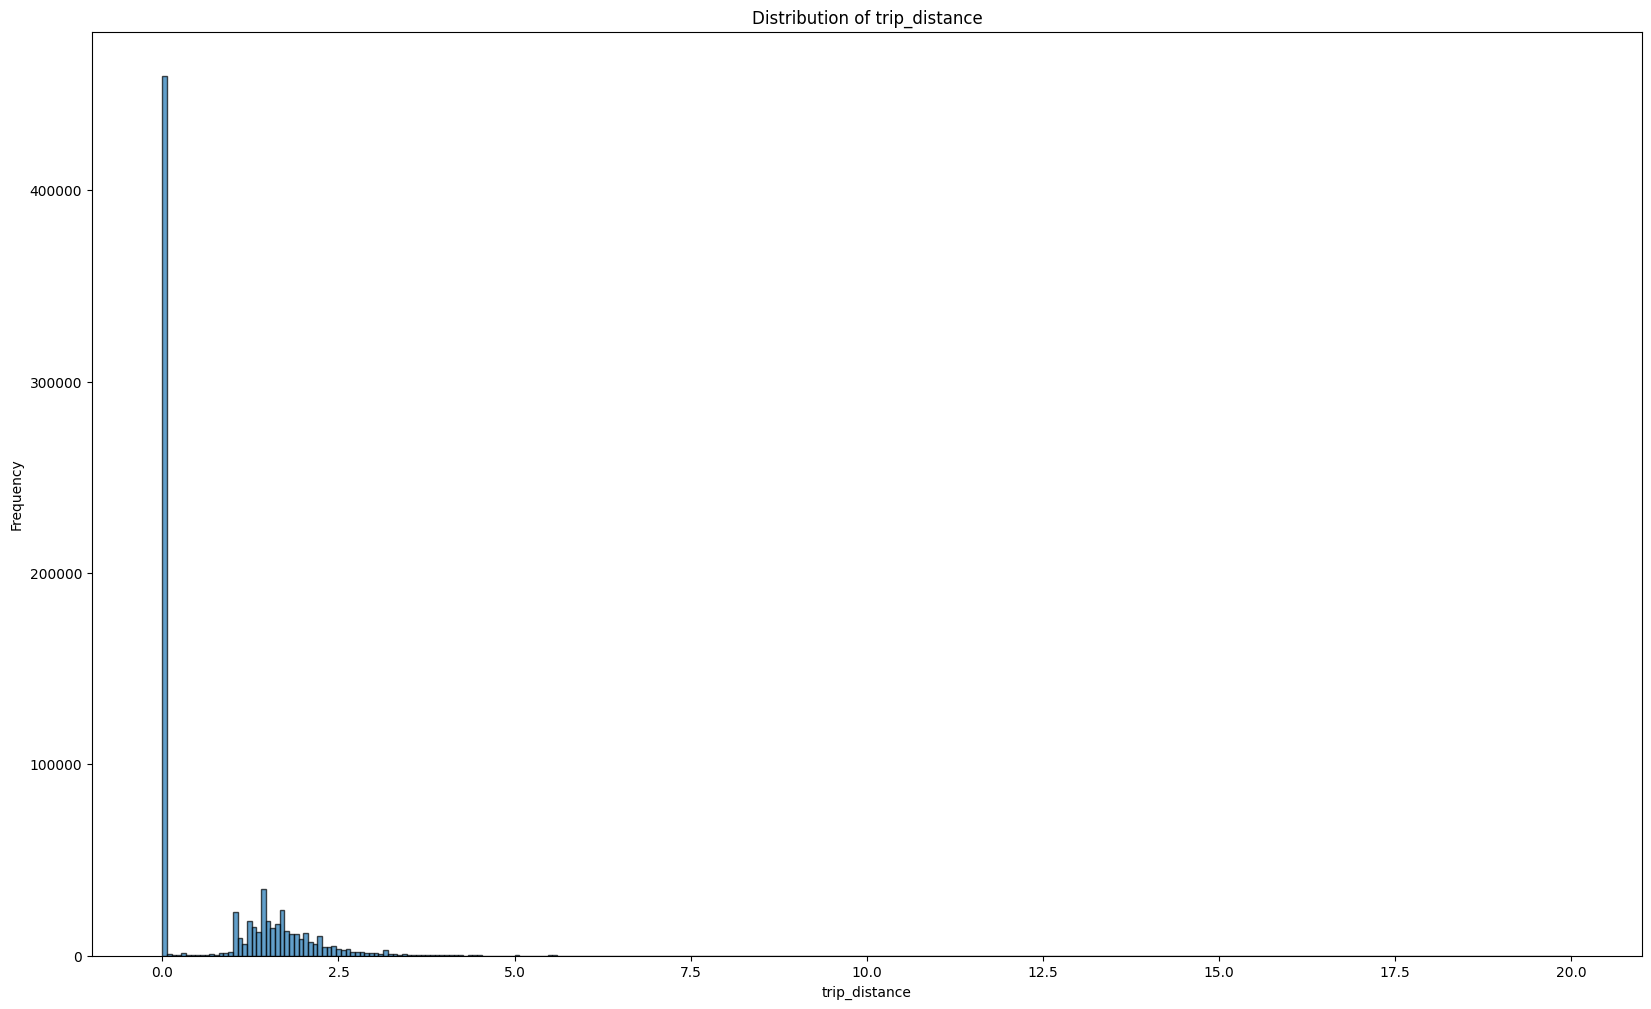

In [38]:
plt.figure(figsize=(20, 12))
plt.hist(df_model_2["tip_amount"], bins=300, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

Let go ahead with the sqrt

lets move on with this.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


X = df_model_2.drop('total_amount', axis=1)
y = df_model_2['total_amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

### Random Forest Regressor

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
X_train.isnull().sum()

VendorID            0
tip_amount          0
tolls_amount        0
trip_type           0
month               0
hour_cos            0
payment_type_2.0    0
trip_distance       0
hour_sin            0
payment_type_3.0    0
payment_type_4.0    0
dtype: int64

In [43]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Sharif University of Tech\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
  File "d

{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}


In [44]:
X_train

,VendorID,tip_amount,tolls_amount,trip_type,month,hour_cos,payment_type_2.0,trip_distance,hour_sin,payment_type_3.0,payment_type_4.0
473343,2.0,0.000000,0,0,8,-2.588190e-01,1,1.925707,9.659258e-01,0,0
271788,2.0,0.000000,0,0,6,2.588190e-01,1,0.086178,-9.659258e-01,0,0
102666,1.0,0.000000,0,0,2,7.071068e-01,1,0.262364,-7.071068e-01,0,0
763948,2.0,1.910497,0,0,11,-9.659258e-01,0,0.048790,2.588190e-01,0,0
155497,2.0,0.000000,0,1,3,-1.836970e-16,1,0.165514,-1.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
275523,2.0,1.661325,0,2,6,1.000000e+00,0,1.214913,0.000000e+00,0,0
387405,2.0,0.000000,0,1,7,-8.660254e-01,0,0.000000,-5.000000e-01,0,0
139174,2.0,0.000000,0,0,3,-8.660254e-01,1,0.819780,-5.000000e-01,0,0
705075,2.0,0.000000,0,0,10,-7.071068e-01,0,2.727853,7.071068e-01,0,0


In [45]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}

In [46]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=200,
                      random_state=42)

In [47]:
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 2.8455
Mean Squared Error (MSE): 59.7269
Root Mean Squared Error (RMSE): 7.7283
R2 Score: 0.8192
Best parameters found by GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}


### XGBoost Regressor

In [65]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [66]:
param_grid_xgb = {
    'n_estimators': [100, 200],              # Number of trees
    'max_depth': [3, 6],                     # Depth of trees
    'learning_rate': [0.01, 0.1],            # Learning rate
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_sample, y_train_sample)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [67]:
# best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
y_pred_xgb = best_xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

print("Best parameters found by GridSearchCV for XGBoost:")
print(grid_search_xgb.best_params_)

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 3.0732
Mean Squared Error (MSE): 69.8564
Root Mean Squared Error (RMSE): 8.3580
R2 Score: 0.7886
Best parameters found by GridSearchCV for XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


### CatBoost

In [69]:
import catboost
from catboost import CatBoostRegressor


best_catboost_model = CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=0)

In [70]:
param_grid_catboost = {
    'iterations': [100, 200],               # Number of boosting iterations
    'depth': [3, 6],                        # Depth of the trees
    'learning_rate': [0.01, 0.1],           # Learning rate
    'l2_leaf_reg': [1, 3],                  # Regularization
}


grid_search_catboost = GridSearchCV(estimator=best_catboost_model, param_grid=param_grid_catboost,
                                    cv=5, n_jobs=-1, verbose=2)
grid_search_catboost.fit(X_train_sample, y_train_sample)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020CEEB06B30>,
             n_jobs=-1,
             param_grid={'depth': [3, 6], 'iterations': [100, 200],
                         'l2_leaf_reg': [1, 3], 'learning_rate': [0.01, 0.1]},
             verbose=2)

In [71]:
best_catboost_model.fit(X_train, y_train)

In [72]:
y_pred_catboost = best_catboost_model.predict(X_test)


mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_catboost:.4f}")
print(f"Mean Squared Error (MSE): {mse_catboost:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost:.4f}")
print(f"R2 Score: {r2_catboost:.4f}")

print("Best parameters found by GridSearchCV for CatBoost:")
print(grid_search_catboost.best_params_)

CatBoost Model Evaluation:
Mean Absolute Error (MAE): 3.0582
Mean Squared Error (MSE): 72.5541
Root Mean Squared Error (RMSE): 8.5179
R2 Score: 0.7804
Best parameters found by GridSearchCV for CatBoost:
{'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


### High Grad

In [73]:
from sklearn.ensemble import HistGradientBoostingRegressor

best_hgb_model = HistGradientBoostingRegressor(random_state=42)

In [74]:
param_grid_hgb = {
    'max_depth': [3, 6],                     # Depth of the trees
    'learning_rate': [0.01, 0.1],            # Learning rate
    'min_samples_leaf': [20, 50],            # Minimum samples per leaf
    'l2_regularization': [0.0, 0.1],         # L2 regularization
}


grid_search_hgb = GridSearchCV(estimator=best_hgb_model, param_grid=param_grid_hgb,
                               cv=5, n_jobs=-1, verbose=2)
grid_search_hgb.fit(X_train_sample, y_train_sample)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'l2_regularization': [0.0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'min_samples_leaf': [20, 50]},
             verbose=2)

In [75]:
best_hgb_model = grid_search_hgb.best_estimator_
best_hgb_model.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=6, random_state=42)

In [76]:
y_pred_hgb = best_hgb_model.predict(X_test)


mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mse_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"HistGradientBoosting Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_hgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_hgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_hgb:.4f}")
print(f"R2 Score: {r2_hgb:.4f}")

print("Best parameters found by GridSearchCV for HistGradientBoostingRegressor:")
print(grid_search_hgb.best_params_)

HistGradientBoosting Model Evaluation:
Mean Absolute Error (MAE): 3.1712
Mean Squared Error (MSE): 65.6487
Root Mean Squared Error (RMSE): 8.1024
R2 Score: 0.8013
Best parameters found by GridSearchCV for HistGradientBoostingRegressor:
{'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 20}


### Vanilla NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df_11 = df_model_2.copy()


X = df_11.drop('total_amount', axis=1)
y = df_11['total_amount']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1))

d:\Sharif University of Tech\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,617 (1.28 MB)

 Trainable params: 333,057 (1.27 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [ ]:
from tqdm.keras import TqdmCallback

history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test),
                    verbose=0,
                    callbacks=[TqdmCallback(verbose=2)])

mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

y_pred = model.predict(X_test)

r2_score(y_pred, y_test)

### AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostRegressor

best_adaboost_model = AdaBoostRegressor(random_state=42)

In [78]:
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],          # Number of boosting iterations (trees)
    'learning_rate': [0.01, 0.1, 1.0],       # Learning rate
    'loss': ['square', 'exponential'],  # Loss function
}


grid_search_adaboost = GridSearchCV(estimator=best_adaboost_model, param_grid=param_grid_adaboost,
                                    cv=5, n_jobs=-1, verbose=2)
grid_search_adaboost.fit(X_train_sample, y_train_sample)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['square', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [79]:
best_adaboost_model = grid_search_adaboost.best_estimator_
best_adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=200,
                  random_state=42)

In [80]:
y_pred_adaboost = best_adaboost_model.predict(X_test)


mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print(f"AdaBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.4f}")
print(f"Mean Squared Error (MSE): {mse_adaboost:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_adaboost:.4f}")
print(f"R2 Score: {r2_adaboost:.4f}")

print("Best parameters found by GridSearchCV for AdaBoostRegressor:")
print(grid_search_adaboost.best_params_)

AdaBoost Model Evaluation:
Mean Absolute Error (MAE): 4.7012
Mean Squared Error (MSE): 95.2530
Root Mean Squared Error (RMSE): 9.7598
R2 Score: 0.7117
Best parameters found by GridSearchCV for AdaBoostRegressor:
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 200}


## EOF